## Введение
В последние годы наблюдается огромный рост использования приложений для знакомств с целью нахождения любви. Многие из этих приложений используют сложные техники анализа данных, чтобы рекомендовать возможные пары пользователям и оптимизировать пользовательский опыт. Эти приложения предоставляют нам доступ к огромному объему информации, которой ранее у нас не было о том, как разные люди переживают романтические отношения.

Цель этого проекта заключается в определении, подготовке, анализе и создании модели машинного обучения для решения конкретного вопроса.

Источник данных:

Файл profiles.csv был предоставлен Codecademy.com


## Определение объема работ
При начале нового проекта полезно создать план проекта. Ниже представлены четыре раздела, которые помогут направить процесс и прогресс проекта. Первый раздел - это цели проекта, раздел, в котором определяются высокоуровневые цели и намерения для данного проекта. Во втором разделе рассматриваются данные. К счастью, в этом проекте данные уже предоставлены, но все равно необходимо проверить, можно ли достичь поставленных целей с использованием доступных данных. Третий раздел - это анализ, который включает в себя методы и выравнивание вопросов с целями проекта. Наконец, оценка поможет сделать выводы и извлечь результаты из анализа.

## Цели проекта
Основной целью этого проекта является практика формулирования вопросов и применение методов машинного обучения для поиска ответов на эти вопросы. Конкретный исследовательский вопрос, который будет рассмотрен, заключается в возможности предсказать религию пользователя OkCupid, используя другие переменные из их профиля. Этот проект имеет важное значение, поскольку религия является важным фактором для многих пользователей при выборе потенциальных партнеров. Кроме того, если пользователи не указывают свою религию, OkCupid хотел бы ее предсказать.

## Данные
Для проекта будет использоваться набор данных, предоставленный Codecademy и названный profiles.csv. Данные включают в себя профили пользователей, где каждая строка представляет собой пользователя OkCupid, а столбцы содержат их ответы на множественный выбор и краткие ответы на вопросы.

## Анализ
Для понимания распределения, количества и взаимосвязи между переменными будут использоваться описательная статистика и визуализация данных. Поскольку основной целью проекта является предсказание астрологических знаков пользователей, будут использоваться алгоритмы классификации машинного обучения с учителем.

## Оценка
В конце проекта модель машинного обучения будет оценена с использованием проверочного набора данных. Для проверки выводов можно использовать матрицу ошибок и метрики, такие как точность, точность, полнота и F1-оценка.

## Загрузка и Проверка Данных
Перед переходом к обучению с учителем важно удостовериться, что в данных есть метка или переменная отклика. Без метки или переменной отклика данные нельзя использовать для обучения с учителем, и может потребоваться рассмотреть альтернативный подход. Если в данных отсутствует ключевая часть для анализа, может потребоваться вернуться к предыдущему этапу и выбрать другую задачу для решения, у которой есть полные и соответствующие данные.

## Import Python Modules

First import the modules being used for this project:

In [2]:
# import general libraries
import pandas as pd
import numpy as np
from IPython.display import display
pd.set_option('display.max_columns', None)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading the Data

To analyze the user profiles from OkCupid, pandas will be used to load the dataset into a DataFrame so that it can be explored and visualized with Python.

Here profiles.csv is loaded into a DataFrame called profiles. The DataFrame is then briefly examined using .head() to check the contents.

In [4]:
# load the dataset
profiles = pd.read_csv('profiles.csv')
profiles

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,NaN,NaN,socially,never,graduated from college/university,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term co

В предоставленном наборе данных имеются следующие столбцы с данными на выбор:

age: непрерывная переменная возраст пользователя
body_type: категориальная переменная типа телосложения пользователя
diet: категориальная переменная информации о диете
drinks: категориальная переменная потребления алкоголя
drugs: категориальная переменная использования наркотиков
education: категориальная переменная уровня образования
ethnicity: категориальная переменная этнической принадлежности
height: непрерывная переменная роста пользователя
income: непрерывная переменная дохода пользователя
job: категориальная переменная описания занятости
offspring: категориальная переменная статуса детей
orientation: категориальная переменная сексуальной ориентации
pets: категориальная переменная предпочтений в отношении домашних животных
religion: категориальная переменная религиозной принадлежности
sex: категориальная переменная пола
sign: категориальная переменная астрологического знака
smokes: категориальная переменная потребления сигарет
speaks: категориальная переменная используемых языков
status: категориальная переменная семейного статуса
last_online: дата последнего входа
location: категориальная переменная местоположения пользователя
А также набор открытых коротких ответов:

essay0: Мое краткое самопредставление
essay1: Чем я занимаюсь в жизни
essay2: В чем я действительно хорош
essay3: Первое, что обычно замечают во мне люди
essay4: Любимые книги, фильмы, шоу, музыка и еда
essay5: Шесть вещей, без которых я не могу обойтись
essay6: Я много времени провожу, думая о...
essay7: В обычную пятницу вечером я...
essay8: Самое личное, что я готов признать
essay9: Вы должны написать мне, если...

In [5]:
# display columns
print(profiles.columns)

# display shape of data
print(profiles.shape)

# display info of data
print(profiles.info())

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
(59946, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  objec

## See duplicates in data

In [6]:
# print number duplicates in data
duplicates = profiles.duplicated()
print("__________________________")
print(duplicates.value_counts())

# print decribe data
print("__________________________")
print(profiles.describe(include='all'))

__________________________
False    59946
dtype: int64
__________________________
                 age body_type             diet    drinks  drugs  \
count   59946.000000     54650            35551     56961  45866   
unique           NaN        12               18         6      3   
top              NaN   average  mostly anything  socially  never   
freq             NaN     14652            16585     41780  37724   
mean       32.340290       NaN              NaN       NaN    NaN   
std         9.452779       NaN              NaN       NaN    NaN   
min        18.000000       NaN              NaN       NaN    NaN   
25%        26.000000       NaN              NaN       NaN    NaN   
50%        30.000000       NaN              NaN       NaN    NaN   
75%        37.000000       NaN              NaN       NaN    NaN   
max       110.000000       NaN              NaN       NaN    NaN   

                                education essay0        essay1     essay2  \
count                   

### Age

In [7]:
# Calculate the IQR
q1 = profiles.age.quantile(0.25)
q3 = profiles.age.quantile(0.75)
iqr = q3 - q1

# Calculate the lower and upper fences
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

profiles_age = profiles[(profiles.age >= lower_fence) & (profiles.age <= upper_fence)].reset_index(drop=True)

count    57308.000000
mean        31.093774
std          7.571302
min         18.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         53.000000
Name: age, dtype: float64
[110, 109, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18]


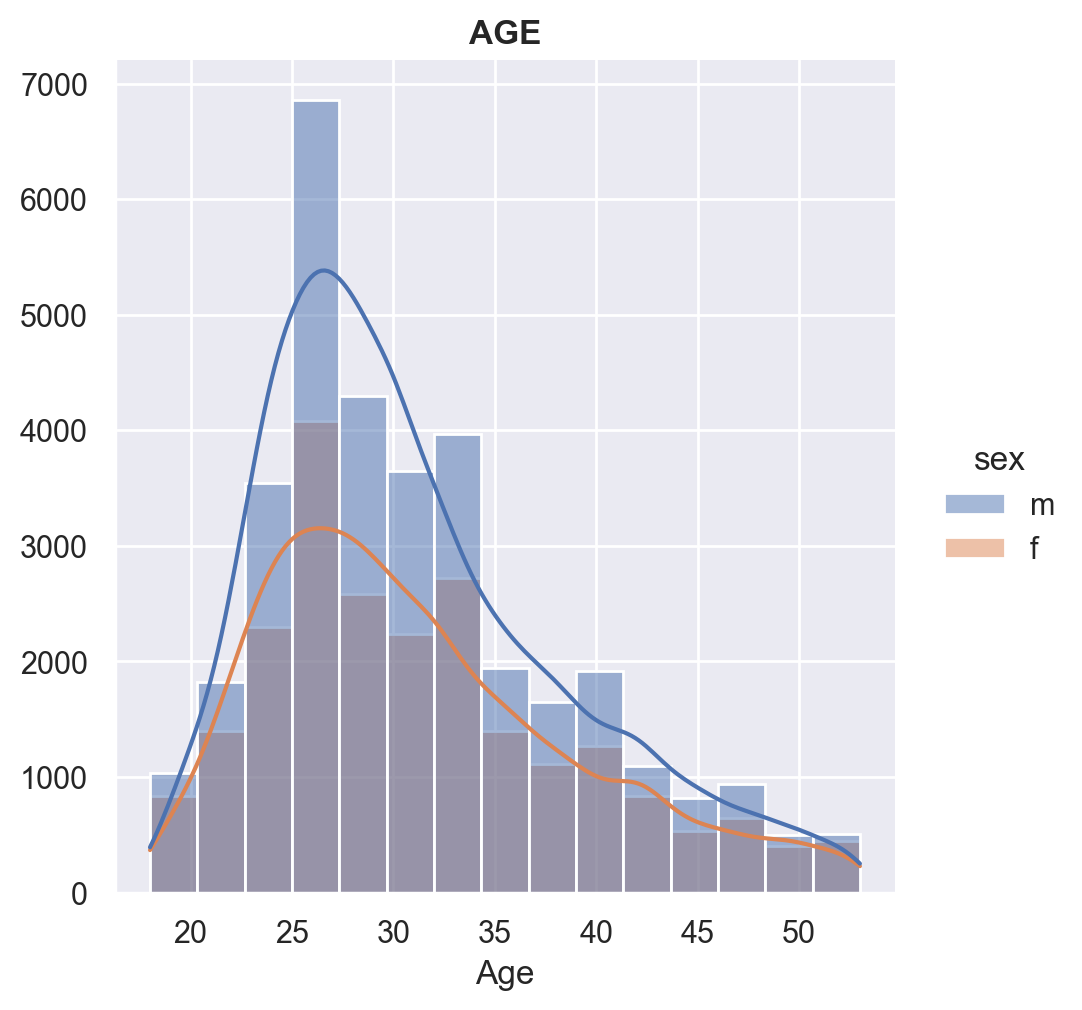

In [8]:
# describe the column
print(profiles_age.age.describe())

# print unique age
print(sorted(profiles.age.unique(), reverse=True))

# hist plot age
sns.displot(x='age', data=profiles_age, bins=15, kde=True, hue='sex')
plt.title("AGE", fontweight='bold')
plt.xlabel("Age")
plt.ylabel("")
plt.savefig("age.png", dpi=1000)
plt.show()

### Body type

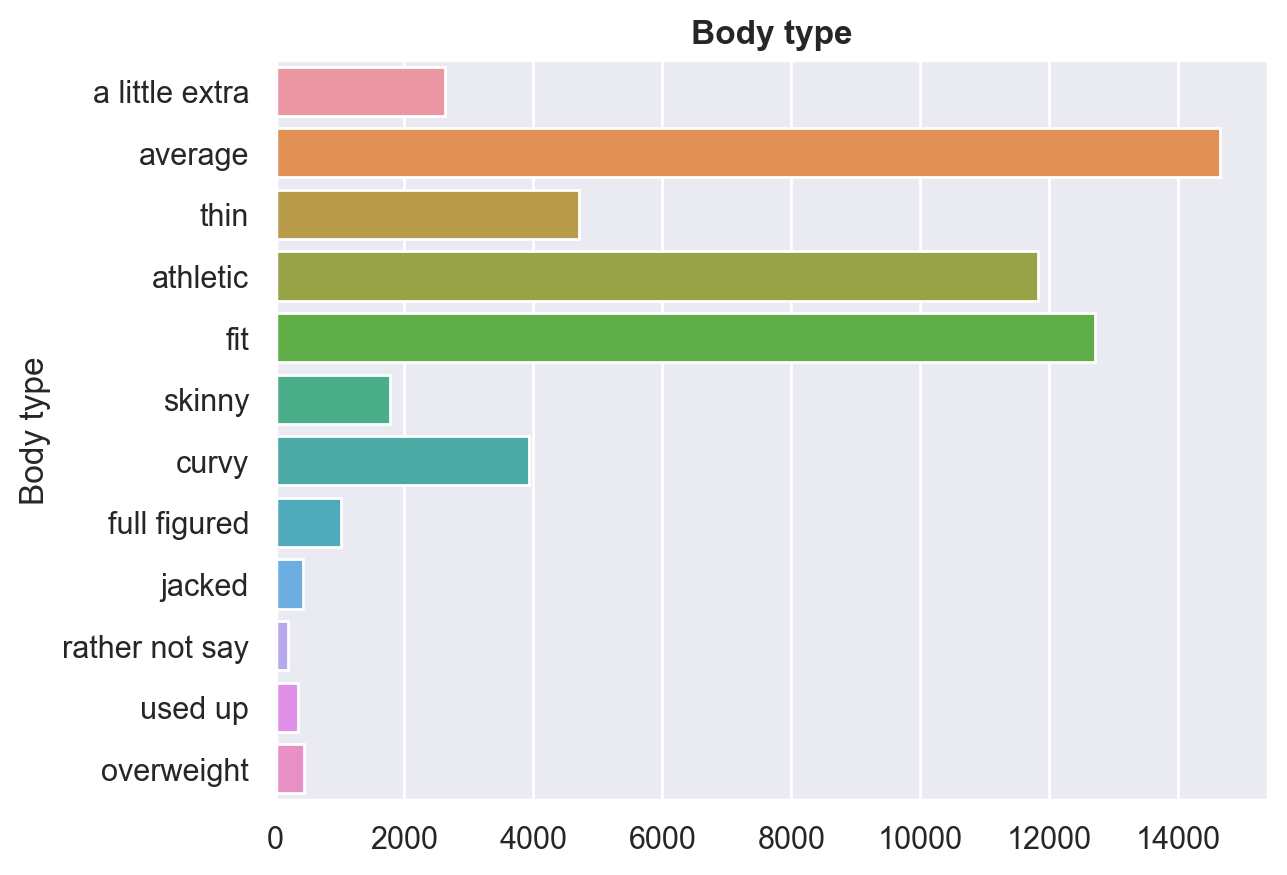

In [9]:
# bar plot
sns.countplot(y=profiles['body_type'])
plt.title("Body type", fontweight='bold')
plt.ylabel("Body type")
plt.xlabel("")
plt.show()

## Diet

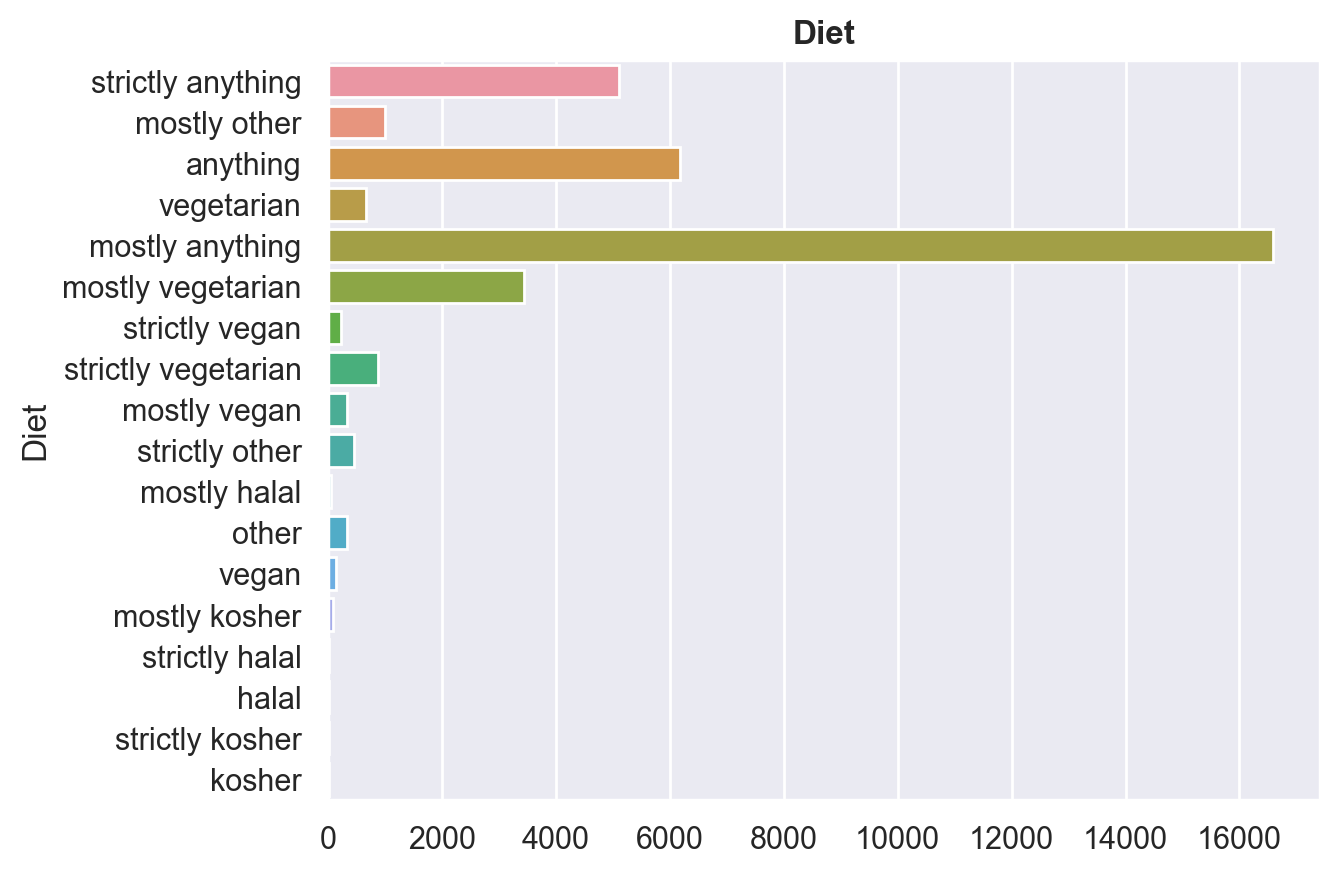

In [10]:
# bar plot
sns.countplot(y='diet', data=profiles)
plt.title("Diet", fontweight='bold')
plt.xlabel("")
plt.ylabel("Diet")
plt.show()

### Drinks

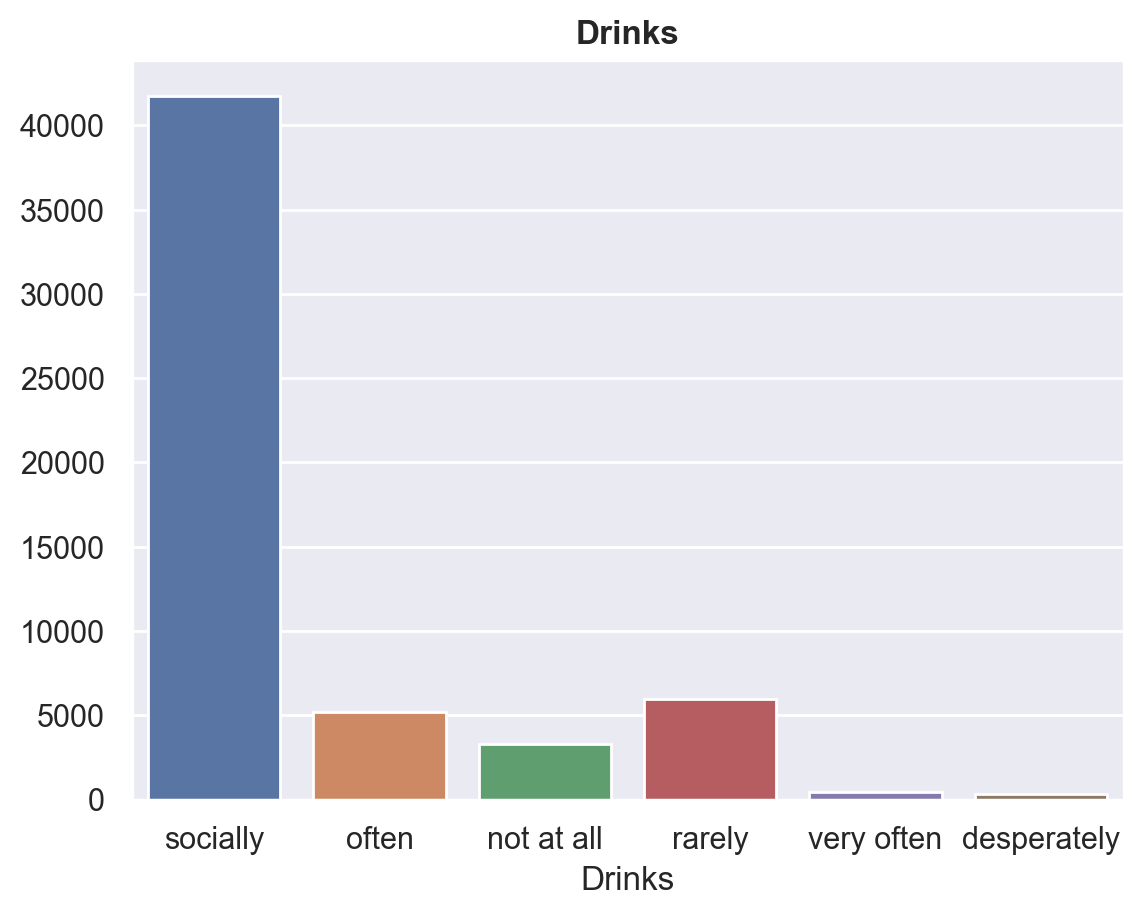

In [11]:
# bar plot
sns.countplot(x='drinks', data=profiles)
plt.title("Drinks", fontweight='bold')
plt.xlabel("Drinks")
plt.ylabel("")
plt.show()

### Drugs

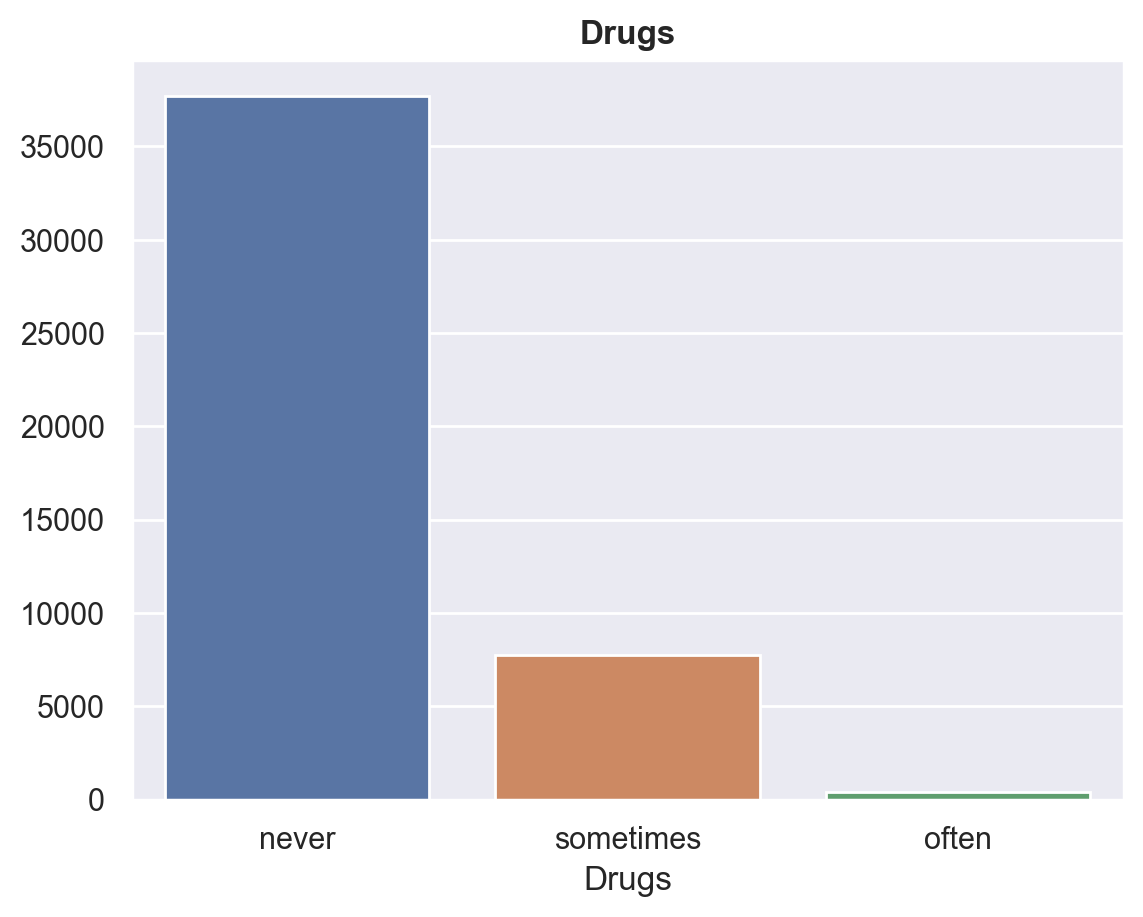

In [12]:
# bar plot
sns.countplot(x='drugs', data=profiles)
plt.title("Drugs", fontweight='bold')
plt.xlabel("Drugs")
plt.ylabel("")
plt.show()

### Education

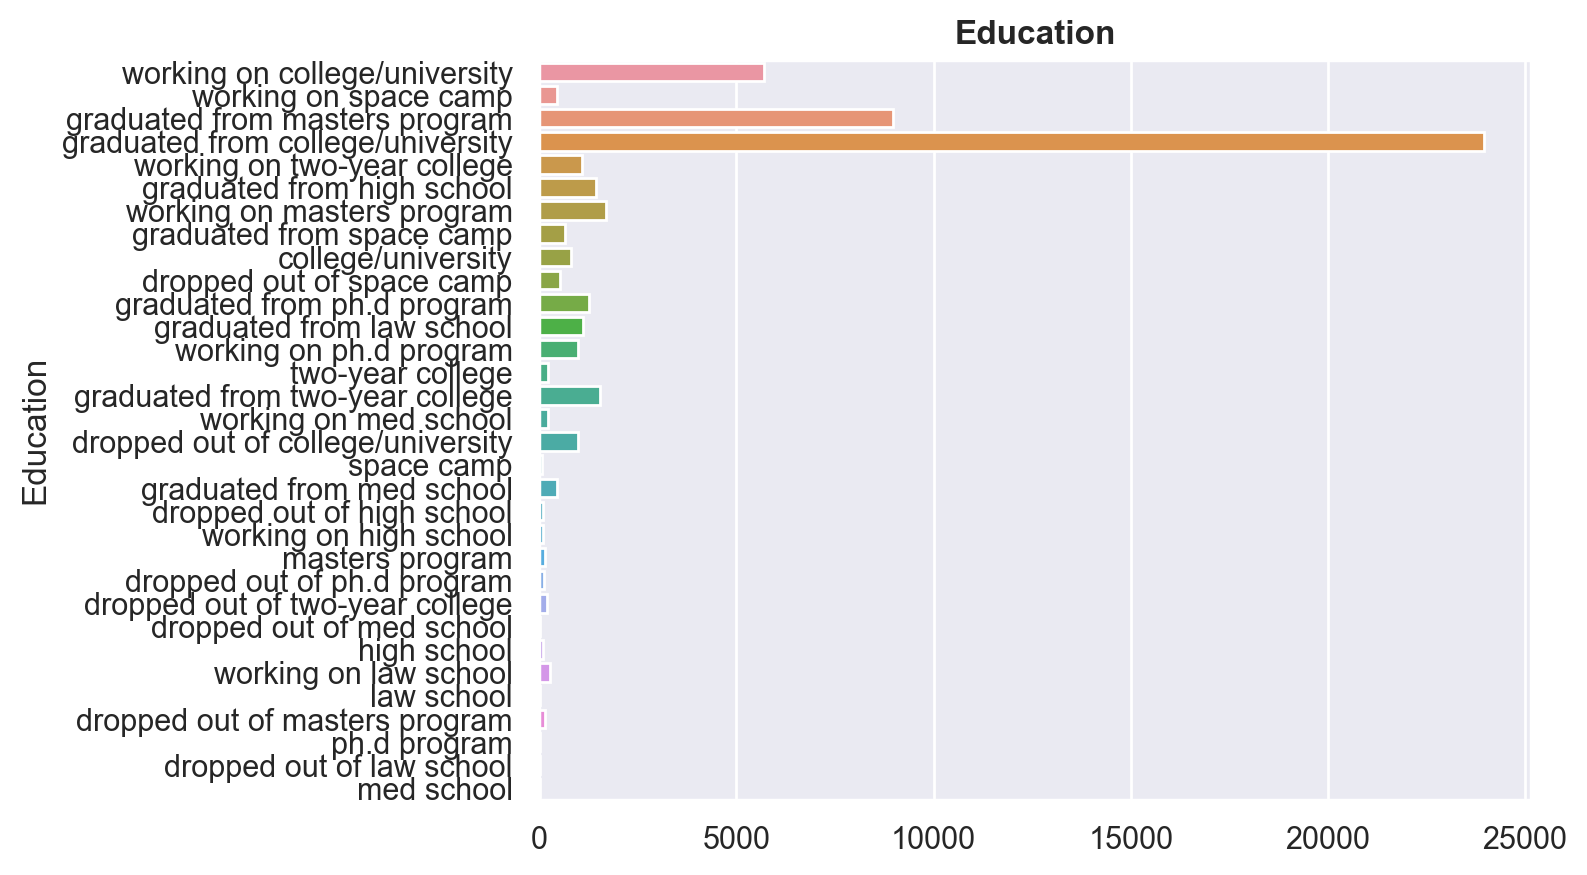

In [13]:
# bar plot
sns.countplot(y='education', data=profiles)
plt.title("Education", fontweight='bold')
plt.ylabel("Education")
plt.xlabel("")
plt.show()

In [14]:
income_coll = profiles.income[profiles.education == 'dropped out of college/university']
income_mast_prog = profiles.income[profiles.education == 'graduated from masters program']


### Heights

In [15]:
# Calculate the IQR
q1 = profiles.height.quantile(0.25)
q3 = profiles.height.quantile(0.75)
iqr = q3 - q1
# Calculate the lower and upper fences
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

profiles_height = profiles[(profiles.height >= lower_fence) & (profiles.height <= upper_fence)].reset_index(drop=True)

count    59943.000000
mean        68.295281
std          3.994803
min          1.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64
57.0
82.0


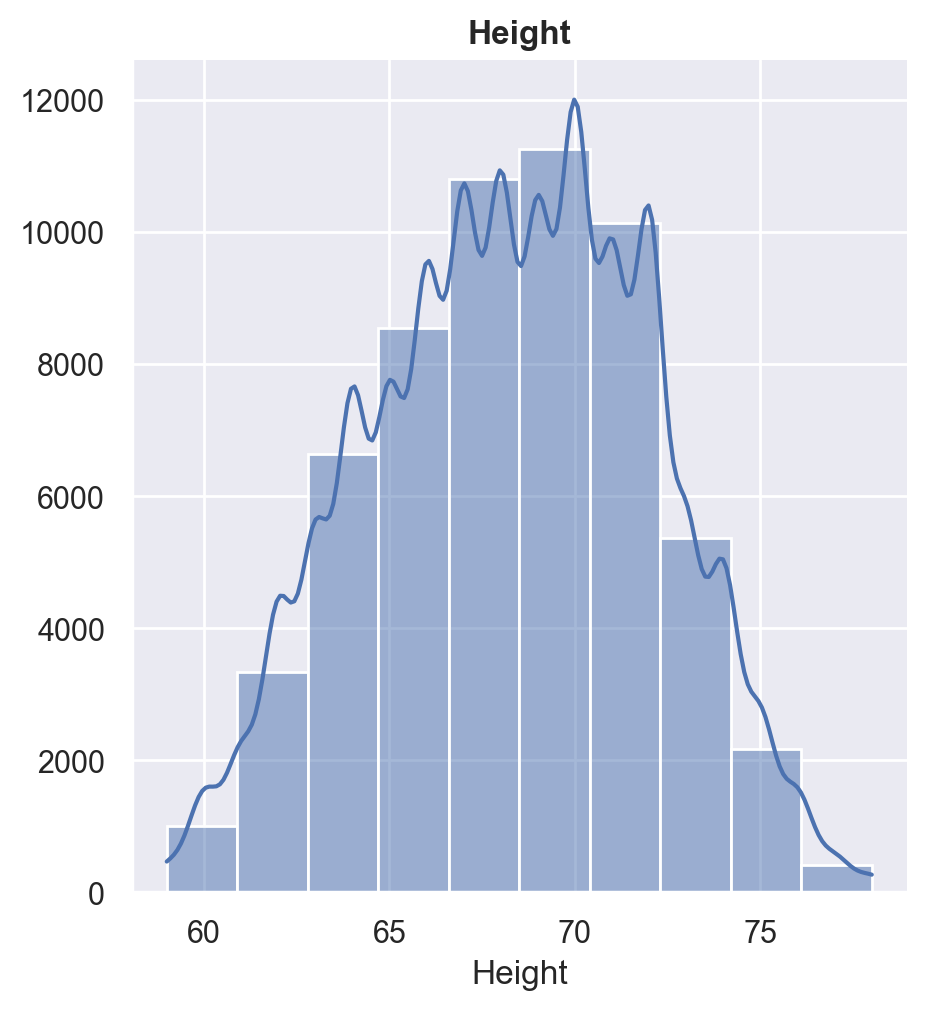

In [16]:
# describe height columns
print(profiles.height.describe())

# cut more impossible value
print(profiles.height.quantile(0.001))
print(profiles.height.quantile(0.999))

# hist plot column
sns.displot(x='height', data=profiles_height, kde=True, bins=10)
plt.title('Height', fontweight='bold')
plt.xlabel('Height')
plt.ylabel('')
plt.show()

### Income

count      59946.000000
mean       20033.222534
std        97346.192104
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64


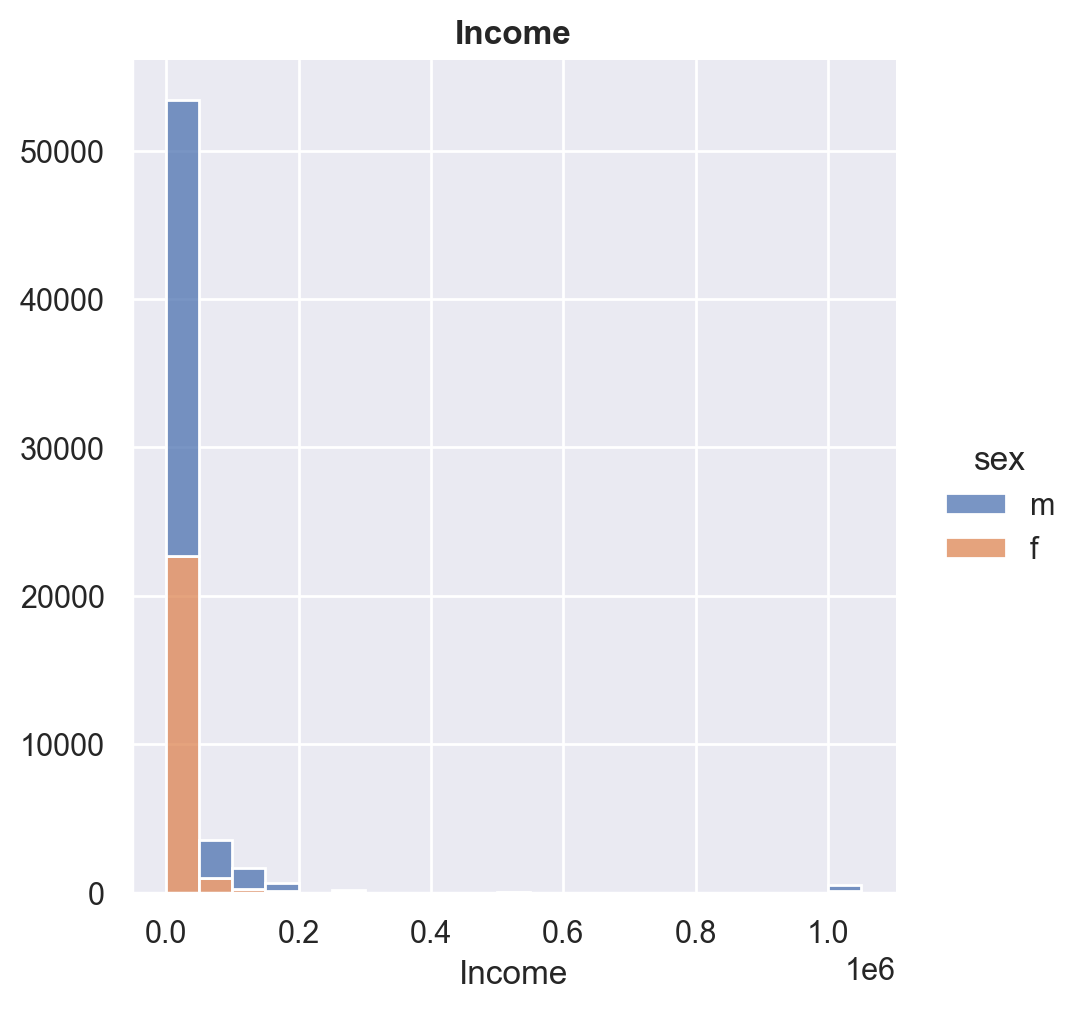

In [17]:
# describe income column
print(profiles.income.describe())

# hist plot column
sns.displot(data=profiles, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack");
plt.title('Income', fontweight='bold')
plt.xlabel('Income')
plt.ylabel("")
plt.show()

### Jobs

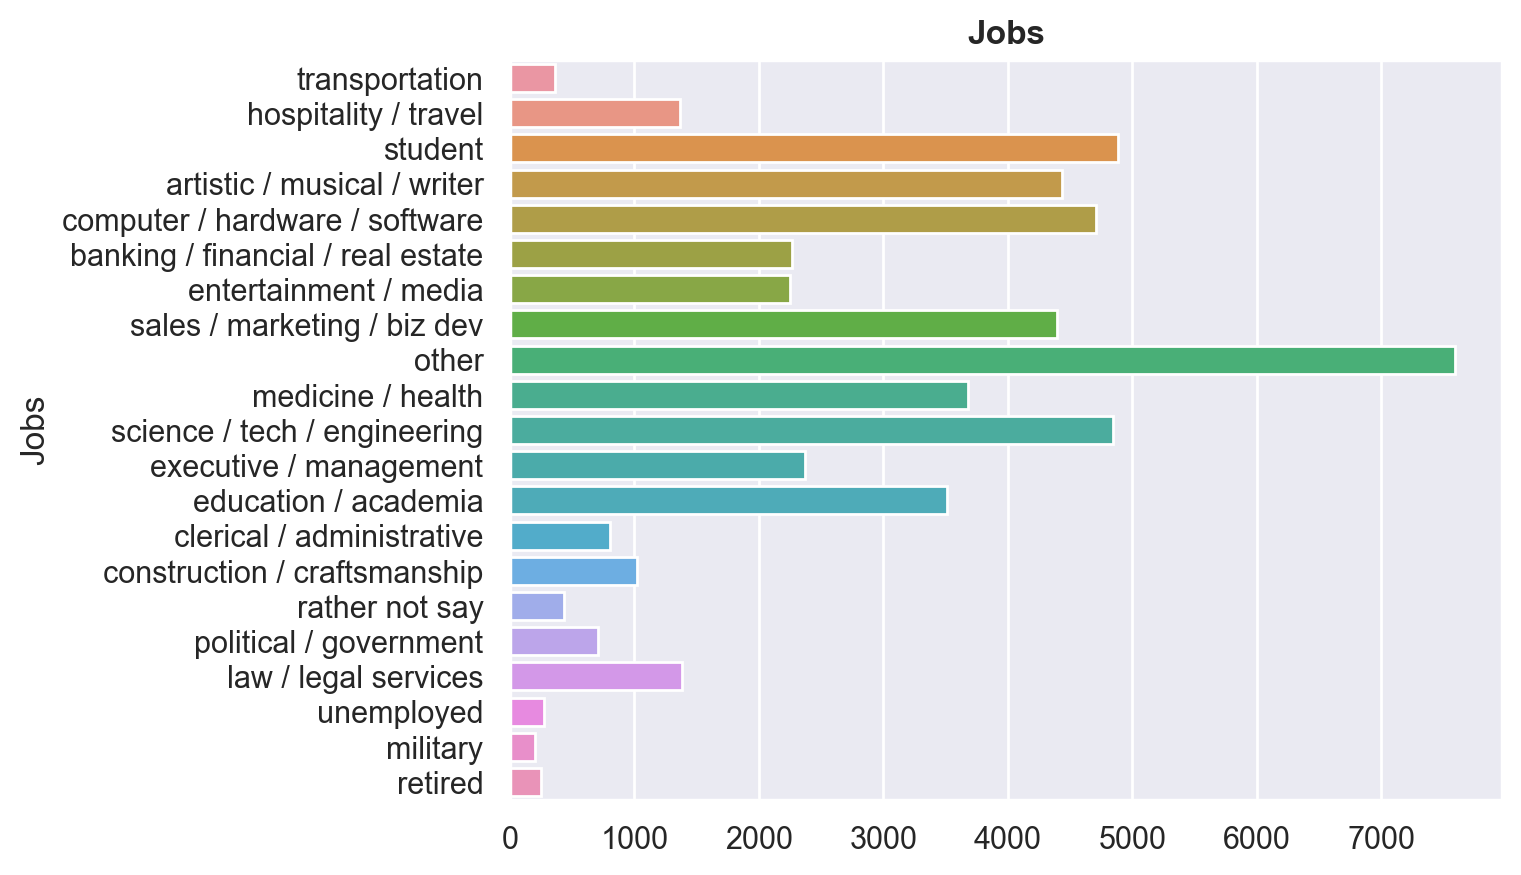

In [18]:
# bar plot
sns.countplot(y='job', data=profiles)
plt.title("Jobs", fontweight='bold')
plt.ylabel("Jobs")
plt.xlabel("")
plt.show()

Самой распространенной указанной профессией является "другое," что может включать в себя различные области, которые не входят в перечисленные категории. За "другими" наиболее часто указываемыми категориями профессий следуют "студент," "наука/техника/инженерия," "компьютеры/аппаратное и программное обеспечение," "продажи/маркетинг/бизнес-развитие," "художественное/музыкальное/писательское дело" и "медицина/здравоохранение." Существуют также категории профессий с гораздо меньшим представительством, такие как "пенсионер," "военнослужащий" и "транспорт." Следует отметить, что некоторые пользователи оставили поле "профессия" пустым или выбрали "предпочитаю не говорить" (rather not say).

### Offspring

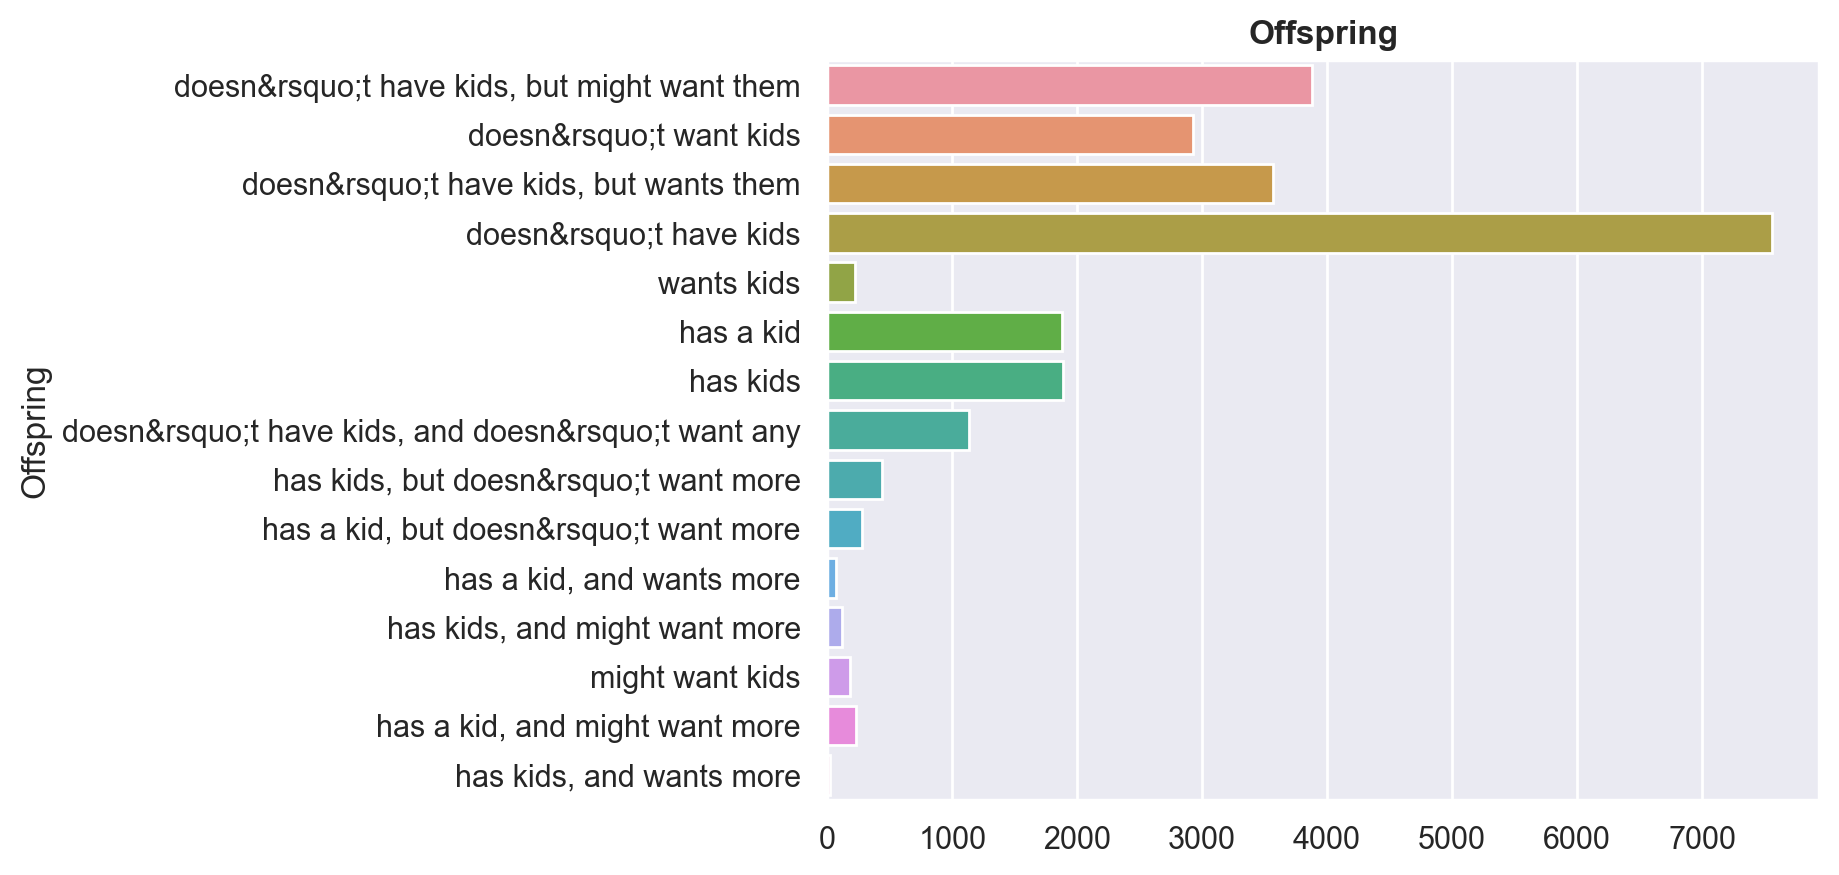

In [19]:
# bar plot
sns.countplot(y='offspring', data=profiles)
plt.title("Offspring", fontweight='bold')
plt.ylabel("Offspring")
plt.xlabel("")
plt.show()

### Orientation

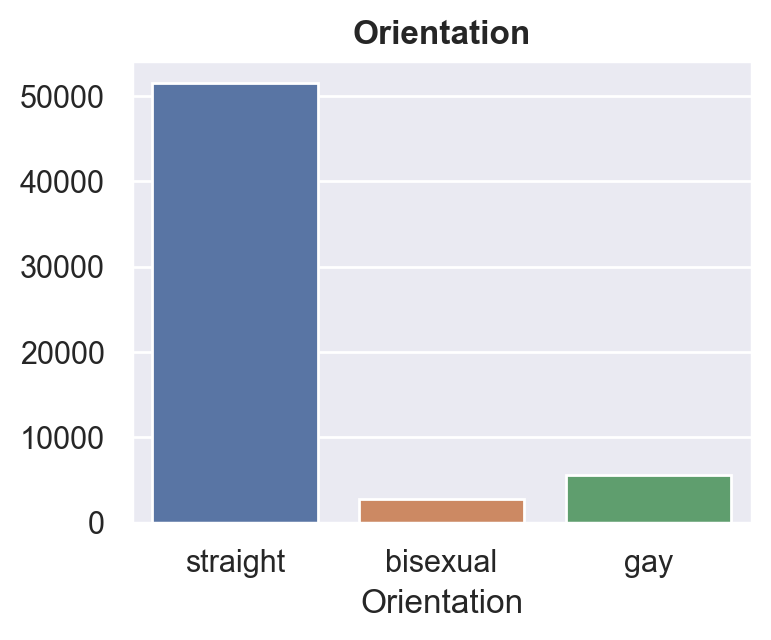

In [20]:
# bar plot
plt.figure(figsize=(4, 3))
sns.countplot(x='orientation', data=profiles)
plt.title("Orientation", fontweight='bold')
plt.xlabel("Orientation")
plt.ylabel("")
plt.show()

### Pets

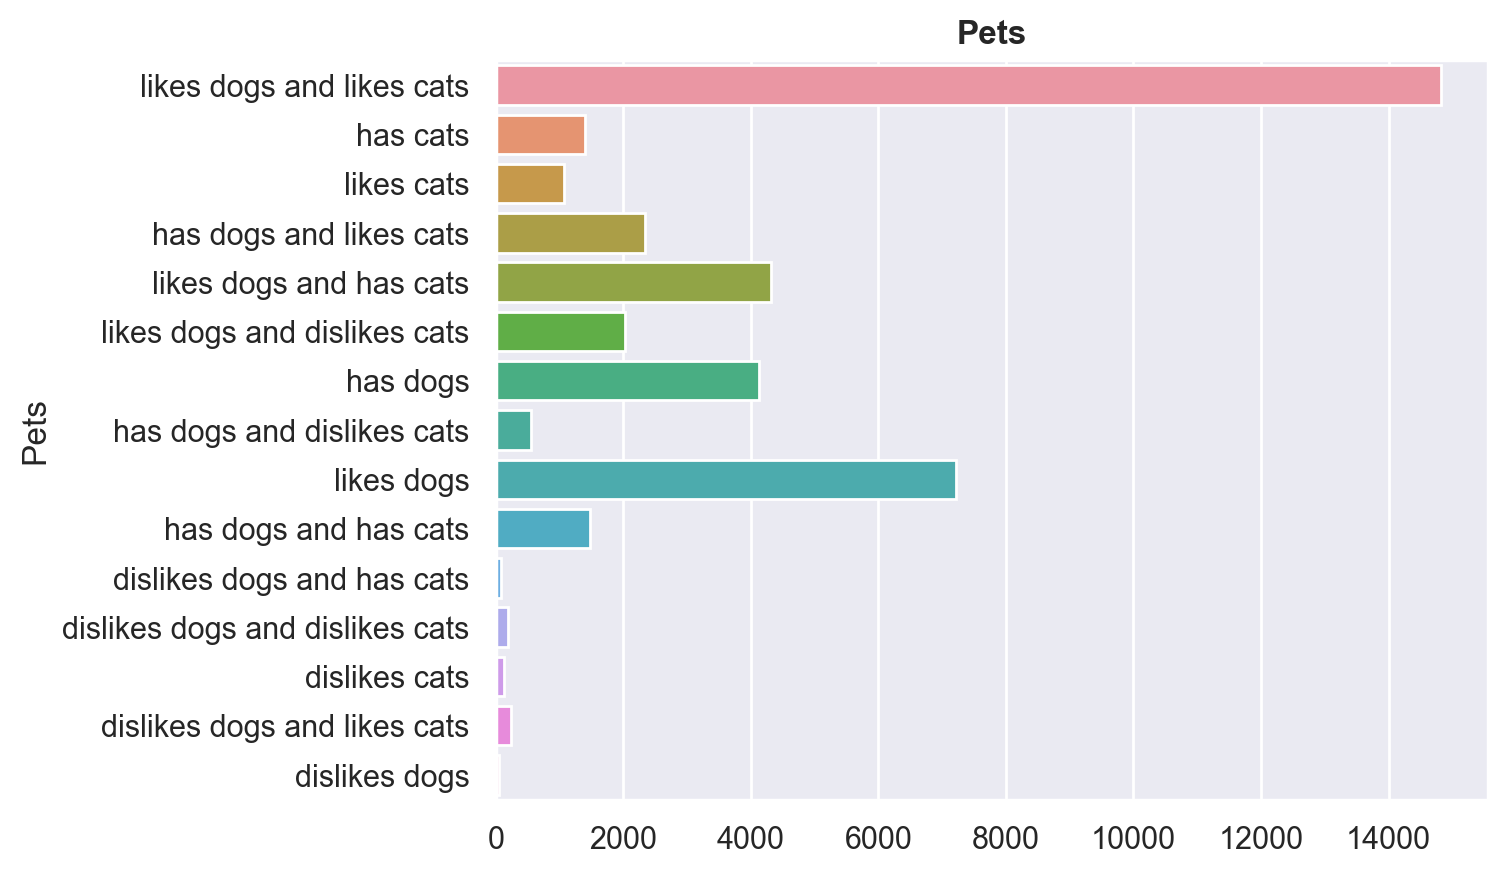

In [21]:
# bar plot
sns.countplot(y='pets', data=profiles)
plt.title("Pets", fontweight='bold')
plt.xlabel("")
plt.ylabel("Pets")
plt.show()

### Religion

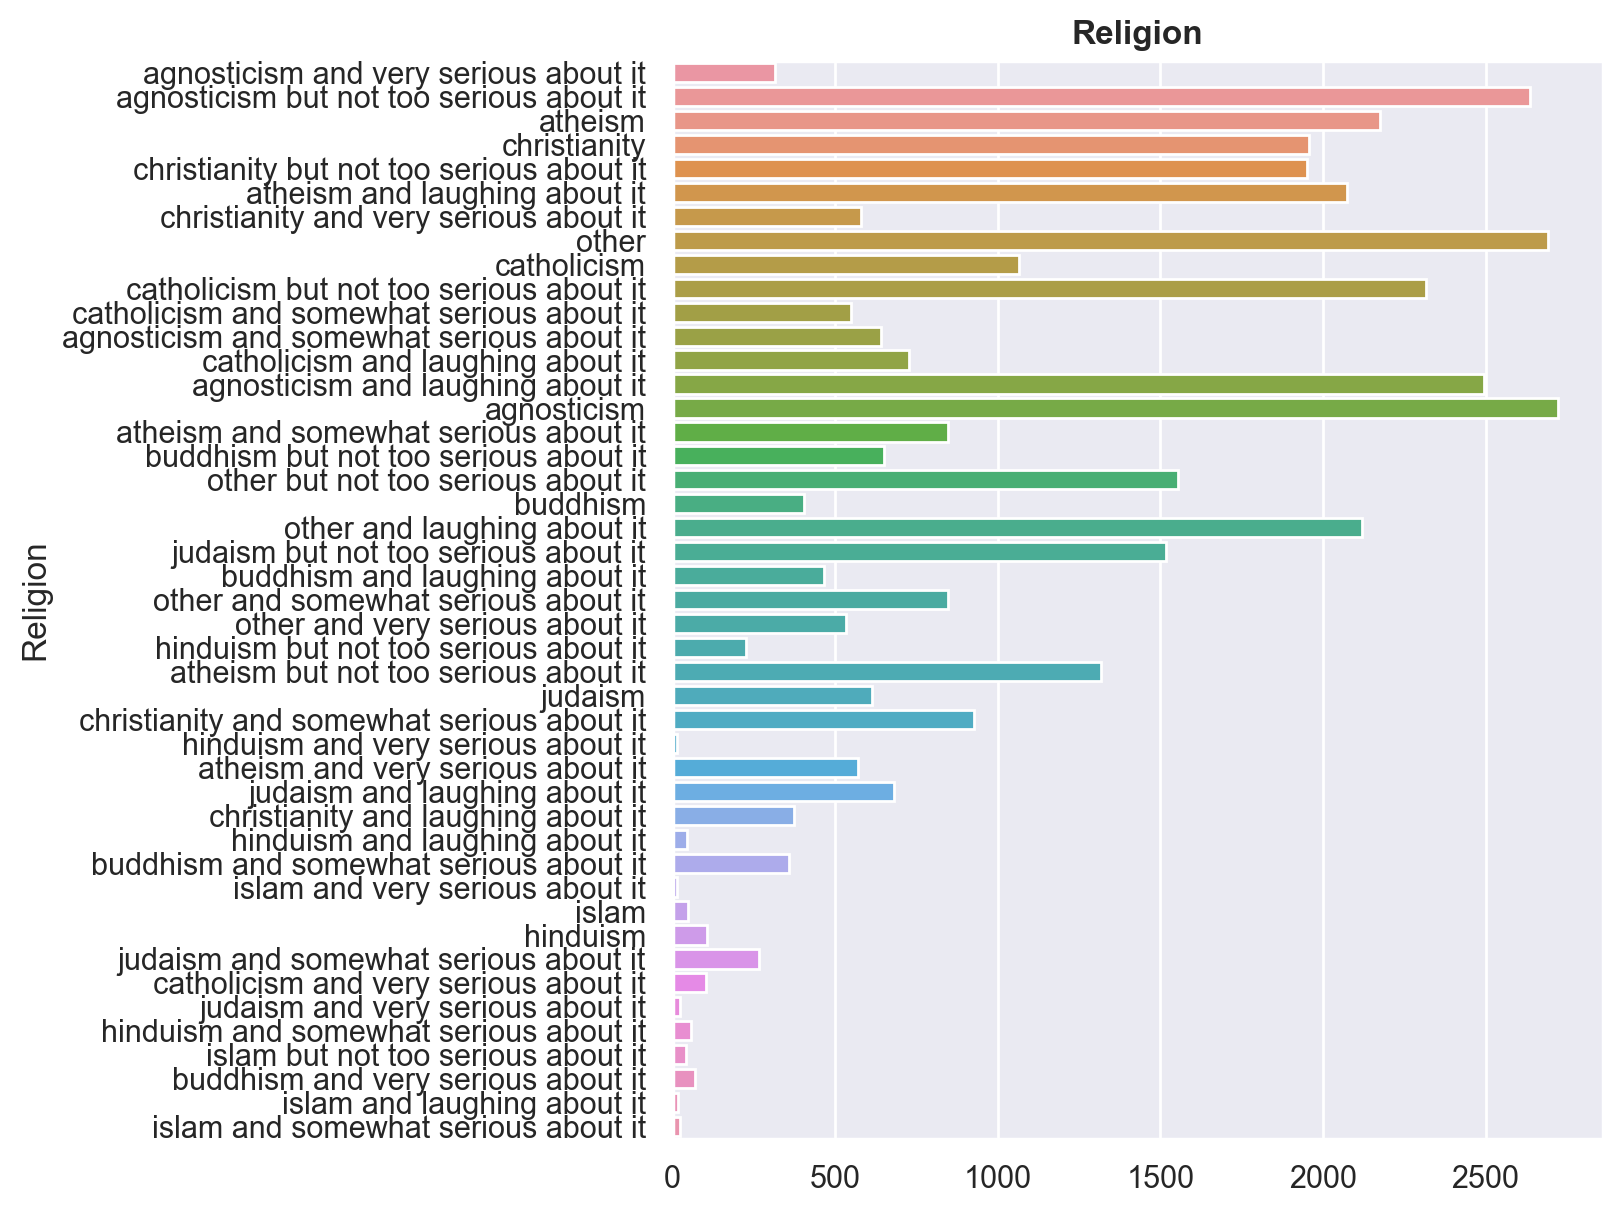

In [22]:
# bar plot
plt.figure(figsize=(6,7))
sns.countplot(y='religion', data=profiles)
plt.title("Religion", fontweight='bold')
plt.xlabel("")
plt.ylabel("Religion")
plt.show()

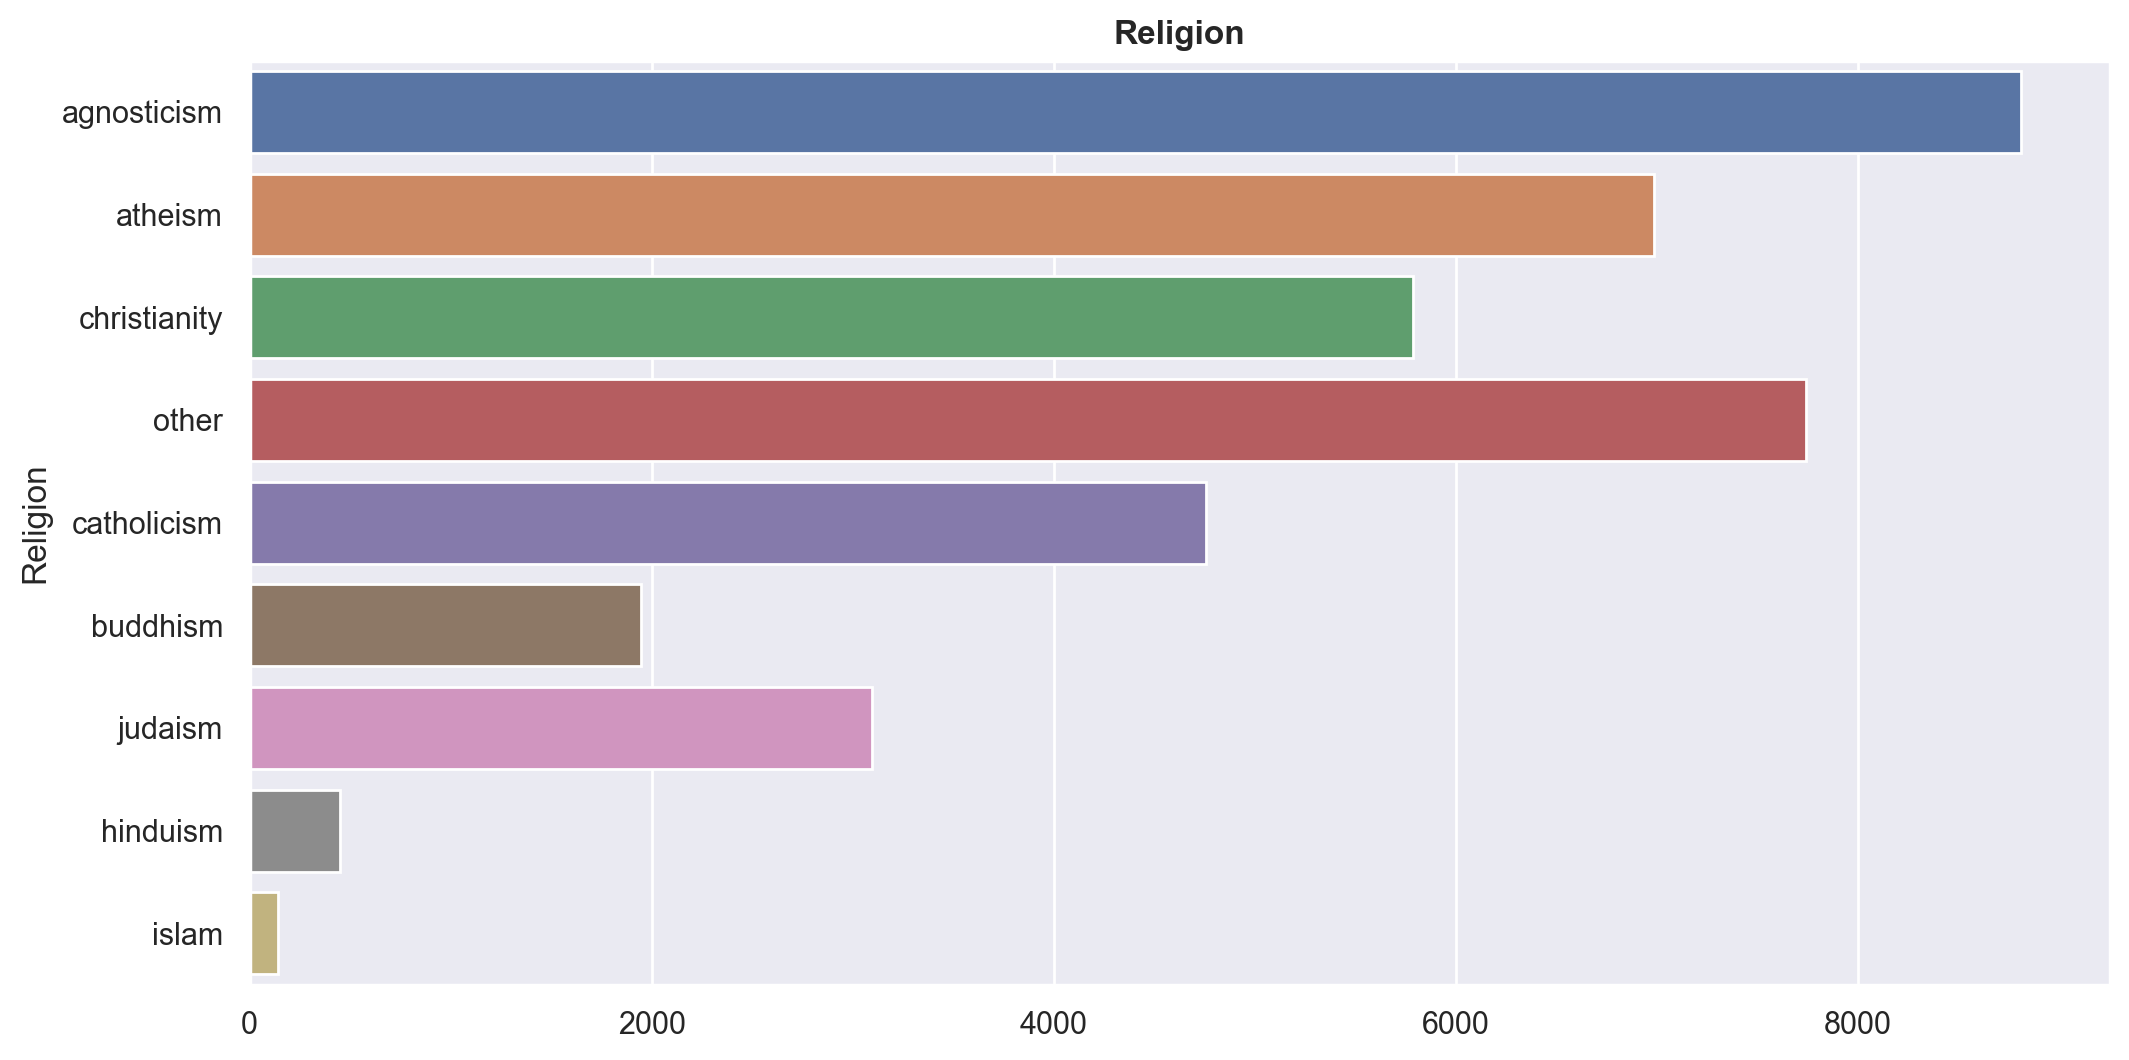

In [23]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)

ax = plt.figure(figsize=(12, 6))
sns.countplot(y='religionCleaned', data=profiles)
plt.title("Religion", fontweight='bold')
plt.xlabel("")
plt.ylabel("Religion")
ax.savefig("religion.png", dpi=1000)
plt.show()

Похоже, что большинство пользователей идентифицируют себя как агностики, представители других религиозных верований или атеисты, причем агностицизм является наиболее распространенным. После этих трех категорий, христианство и католицизм являются самыми распространенными религиозными убеждениями, а также иудаизм и буддизм имеют значительное количество последователей. У хиндуизма и ислама на платформе относительно меньше последователей.

### Sex

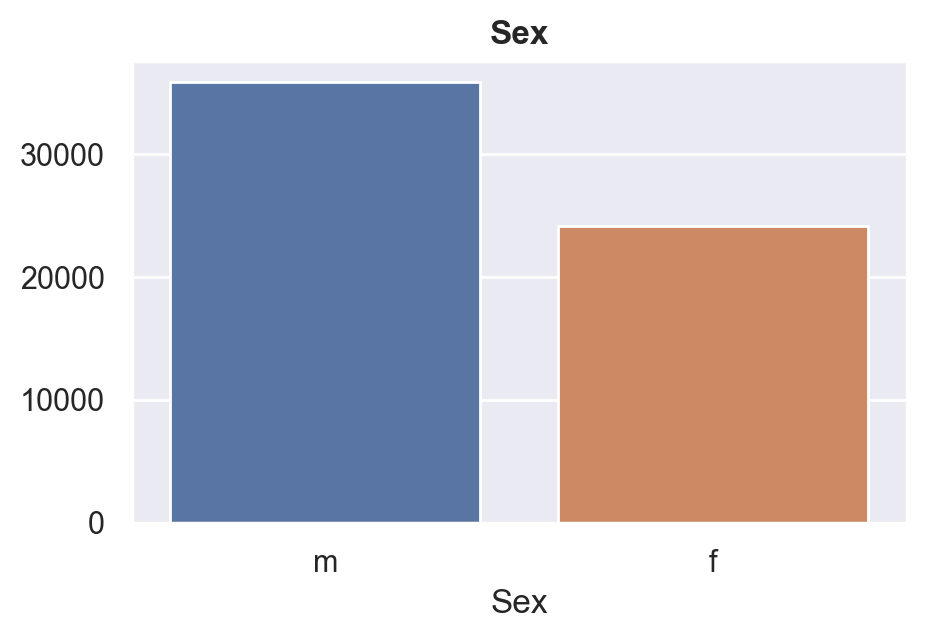

In [24]:
# bar plot
plt.figure(figsize=(5,3))
sns.countplot(x='sex', data=profiles)
plt.title("Sex", fontweight='bold')
plt.ylabel("")
plt.xlabel("Sex")
plt.savefig("sex.png", dpi=1000)
plt.show()

### Sign

In [25]:
profiles['signsCleaned'] = profiles.sign.str.split().str.get(0).reset_index(drop=True)

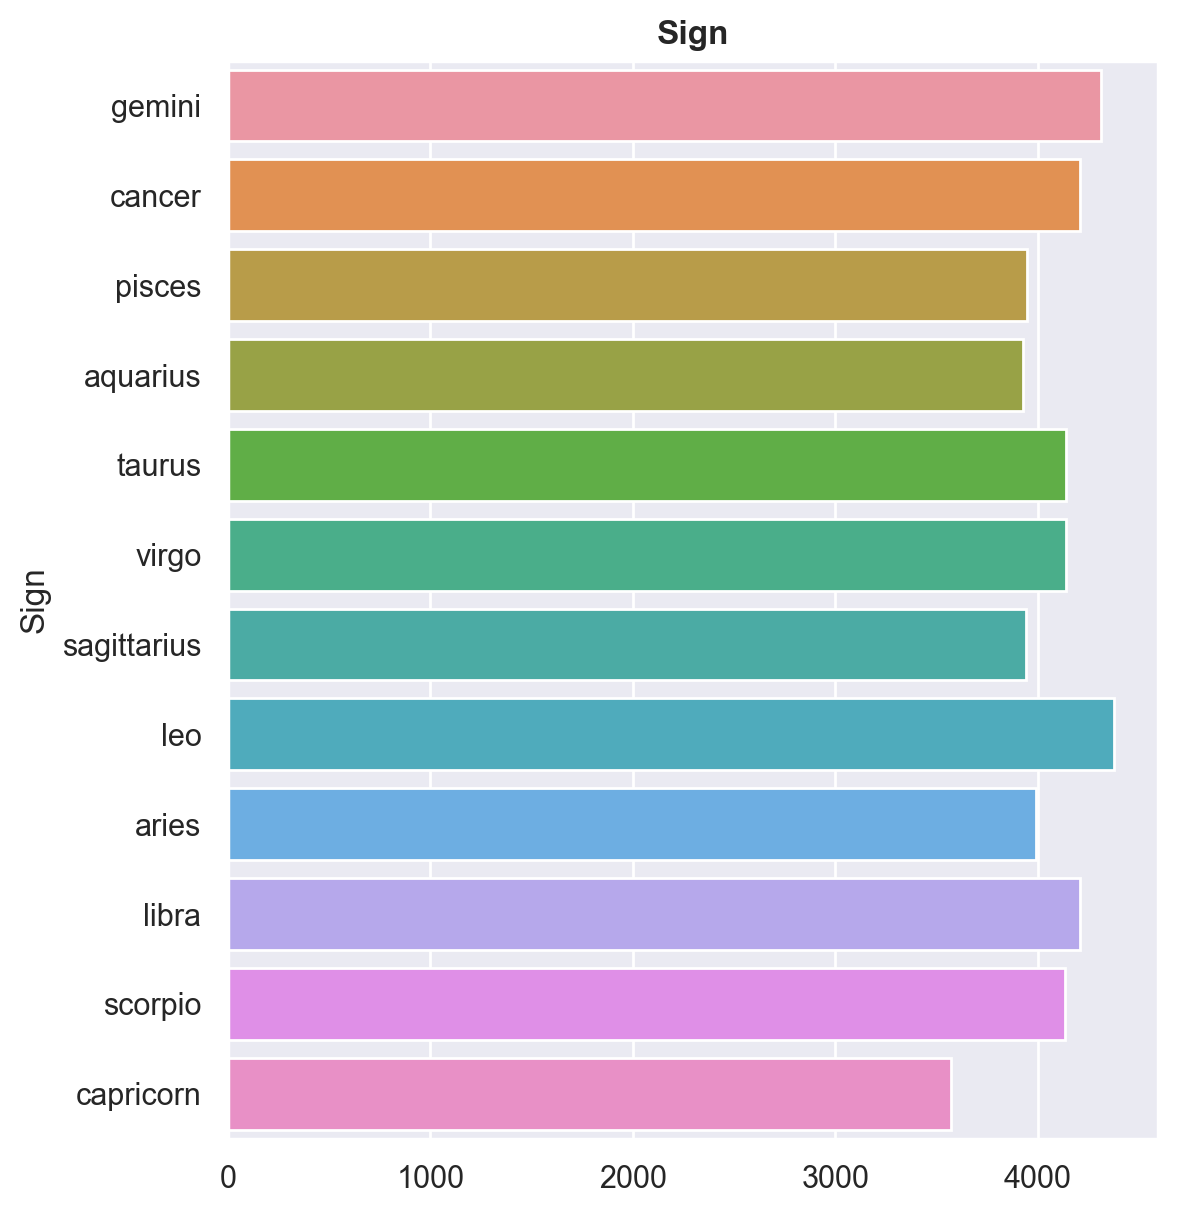

In [26]:
# bar plot
plt.figure(figsize=(6,7))
sns.countplot(y='signsCleaned', data=profiles)
plt.title("Sign", fontweight='bold')
plt.xlabel("")
plt.ylabel("Sign")
plt.show()

Самым распространенным знаком зодиака среди пользователей является Лев, за которым следуют Близнецы, Весы и Рак. У Вирго, Тельца и Скорпиона также есть значительное количество пользователей. Овен, Рыбы, Стрелец и Водолей имеют схожее количество пользователей, в то время как Козерог имеет наименьшее количество пользователей среди знаков зодиака.

### Smokes

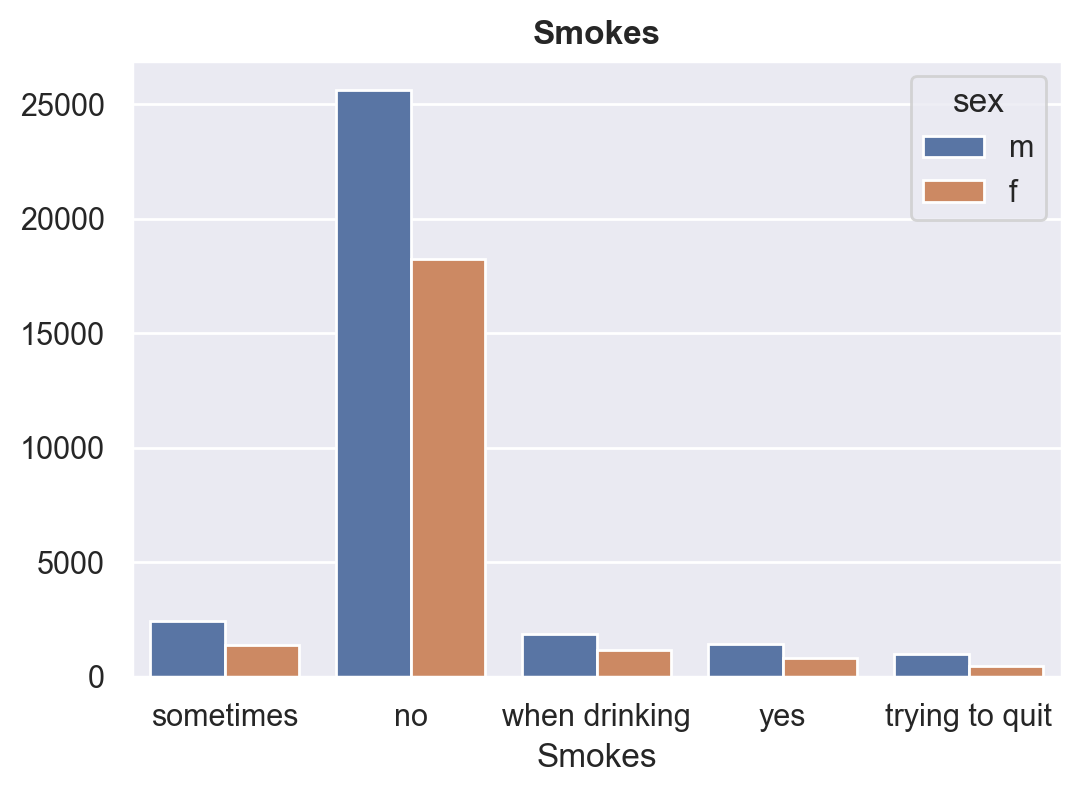

In [27]:
# bar plot
plt.figure(figsize=(6,4))
sns.countplot(x='smokes', data=profiles, hue='sex')
plt.title("Smokes", fontweight='bold')
plt.ylabel("")
plt.xlabel("Smokes")
plt.show()

Большинство пользователей, примерно 44 000 человек, указали, что они не курят. Только 2 231 пользователя утверждают, что курят регулярно, в то время как 1 480 пользователей упомянули, что пытаются бросить курить.

### Status

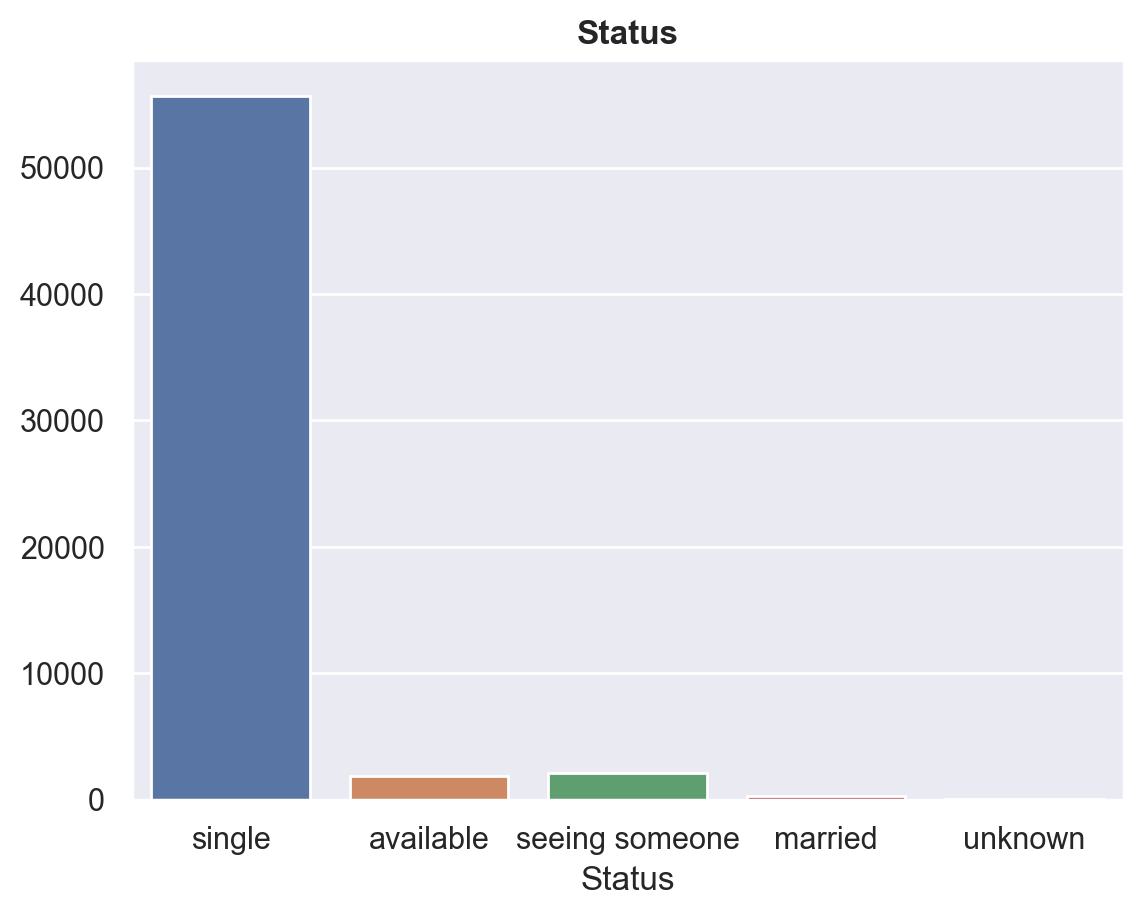

In [28]:
# bar plot
sns.countplot(x='status', data=profiles)
plt.title("Status", fontweight='bold')
plt.ylabel("")
plt.xlabel("Status")
plt.show()

Большинство пользователей холосты. Есть 2 064 пользователя, которые в настоящее время в отношениях, и 1 865 пользователей, которые доступны. Меньшее количество пользователей состоит в браке.

## Tests

Мы целью нашего исследования ставили выяснить, есть ли статистически значимая разница в возрасте между мужскими и женскими пользователями на социальной сети.

Гипотезы:

Нулевая гипотеза (H0): Нет значительной разницы в среднем возрасте между мужчинами и женщинами на сайте знакомств.

Альтернативная гипотеза (HA): У женщин существенно меньший средний возраст, чем у мужчин на сайте знакомств.

In [29]:
from scipy.stats import ttest_ind

# subset the data by sex
male_ages = profiles_age.age[profiles_age.sex == 'm']
female_ages = profiles_age.age[profiles_age.sex == 'f']

# perform the t-test assuming unequal variances
t_stat, p_val = ttest_ind(a=female_ages, b=male_ages, equal_var=False, alternative='less', )
print(p_val)

0.999888413133527


При уровне значимости 0,05 можно сделать вывод, что p-значение 0,999888413133527 больше уровня значимости. Следовательно, мы не отвергаем нулевую гипотезу и приходим к выводу, что недостаточно доказательств для того, чтобы утверждать, что у женщин возраст ниже, чем у мужчин в данной популяции.

Отношение между образованием и доходом давно изучается, и множество исследований показывают, что более высокий уровень образования обычно ассоциируется с более высокими доходами. Тем не менее, важно более детально рассмотреть это отношение, особенно в отношении различий между теми, кто завершил свое образование, и теми, кто этого не сделал.

Гипотезы:

Нулевая гипотеза (H0): Нет значительной разницы в среднем доходе между теми, кто закончил учебу, и теми, кто бросил.

Альтернативная гипотеза (HA): Те, кто закончил учебу, имеют значительно более низкий средний доход, чем те, кто бросил.

In [30]:
# subset the data by education
income_not_drop = profiles.income[profiles.education == 'graduated from college/university']
income_drop = profiles.income[profiles.education == 'dropped out of college/university']

# perform the t-test
t_stat, p_val = ttest_ind(a=income_not_drop, b=income_drop, equal_var=False, alternative='less')
print(p_val)

2.7798641326929206e-05


Наш анализ показал статистически значимое различие в доходе между теми, кто закончил колледж/университет, и теми, кто бросил учебу (p-значение = 2.78e-05). Конкретно, у тех, кто бросил учебу, средний доход оказался выше, чем у тех, кто закончил учебу.

Наши результаты свидетельствуют о наличии разницы в доходах между теми, кто бросил учебу в колледже/университете, и теми, кто закончил учебу, причем те, кто бросил учебу, в среднем имеют более высокий доход.

Анализ включал в себя использование хи-квадрат теста для определения наличия статистически значимой связи между гендером и употреблением наркотиков.

In [31]:
from scipy.stats import chi2_contingency

# separate the men and women
men_data = profiles[profiles.sex == 'm'].dropna(subset='drugs')
fem_data = profiles[profiles.sex == 'f'].dropna(subset='drugs')

# determine the size of the smaller group
n = len(fem_data)

# randomly select a subset of the men
men_data = men_data.sample(n=n, random_state=42)

# concatenate the men and women back together
balanced = pd.concat([men_data, fem_data])

cross = pd.crosstab(balanced.sex, balanced.drugs)
cross

drugs,never,often,sometimes
sex,,,
f,15829,128,2695
m,15027,187,3438


In [32]:
# chi-squared test on the balanced data
chi2, pval, dof, expected = chi2_contingency(cross)
print(pval)

3.3712616665113124e-27


Наши результаты позволяют предположить, что существует значительная связь между гендером и употреблением наркотиков, причем мужчины более вероятно сообщают о потреблении наркотиков, чем женщины. Эти результаты могут иметь важные последствия для общественного здравоохранения и усилий по предотвращению употребления наркотиков, ориентированных на конкретные группы населения.

## Data Preperation

### Clean null data

На данном этапе мы рассмотрим важность чистых данных в статистическом анализе. Чистые данные необходимы для обеспечения точности и надежности результатов, полученных при анализе данных.

In [33]:
# print number nulls in columns
print(profiles.isna().sum())

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
religionCleaned    20226
signsCleaned       11056
dtype: int64


In [34]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'signsCleaned',
       'sex', 'job', 'smokes', 'drinks', 'religionCleaned']


# clean all null data
df = profiles[cols].dropna(subset=cols).reset_index(drop=True)

# see new size
df.shape

(15751, 10)

### Encoder our features

Кодирование (encoding) - важный этап предварительной обработки данных, так как многие алгоритмы машинного обучения требуют числовых входных переменных. На этом этапе мы преобразуем категориальные переменные в числовые представления, что позволяет нам использовать их в наших моделях.

In [35]:
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
encoder = LabelEncoder()

# loop through each column in cols and transform it using LabelEncoder
for col in cols:
    df[col] = encoder.fit_transform(df[col])

### Label Imbalance 

Дисбаланс меток (label imbalance) означает ситуацию, когда распределение классов в целевой переменной не является сбалансированным, то есть один класс имеет значительно меньше образцов, чем другие. Это может привести к смещенным моделям, которые предпочитают большинство класса и плохо справляются с меньшинством. Важно решить проблему дисбаланса меток перед обучением модели машинного обучения, чтобы обеспечить справедливые и точные прогнозы.

In [36]:
df.religionCleaned.value_counts()

0    3671
8    3339
1    2687
4    2163
3    1859
7    1062
2     788
5     136
6      46
Name: religionCleaned, dtype: int64

### Spliting data

Разделение данных - важный этап при создании модели машинного обучения. Этот процесс включает в себя разделение набора данных на обучающие и тестовые поднаборы, где обучающий набор используется для обучения модели, а тестовый набор - для оценки ее производительности. Цель состоит в том, чтобы убедиться, что модель обобщается хорошо на новые, невиденные данные.

In [37]:
from sklearn.model_selection import train_test_split

# Y is the target column, X has the rest
X = df.iloc[:, 1:]
Y = df.iloc[:, -1]

# split the data into chunks
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

## Prediction

### Model building

Построение модели - это процесс обучения и оценки модели машинного обучения с использованием предварительно обработанных данных. На этом этапе можно использовать различные алгоритмы для создания модели, и ее производительность может быть оценена с использованием метрик, таких как точность, точность, полнота и F1-оценка. Лучшая модель, проявляющая наилучшую производительность, может быть выбрана для развертывания.

#### Evaluation Metrics

In the models, there will be several values that can be evaluated below is a quick diagram:
![](https://miro.medium.com/max/1400/1*UVP_xb4F6J-M-xH3haz5Jw.png)
here is a quick description of the metrics:

Точность (Accuracy): это отношение правильных значений к общему количеству значений.
Точность (Precision): это отношение Истинных Положительных результатов к сумме Истинных Положительных результатов и Ложных Отрицательных результатов. Точность - это значения Истинных Положительных результатов, деленные на фактические положительные значения.
Полнота (Recall): это отношение Истинных Положительных результатов к сумме Истинных Положительных результатов и Ложных Положительных результатов. Полнота - это значения Истинных Положительных результатов, деленные на предсказанные положительные значения.
F1-оценка (F1-score): это сбалансированный показатель точности и полноты, который учитывает оба значения.
Macro Avg (Макро-среднее): это невзвешенное среднее значение точности и полноты.
Weighted Avg (Взвешенное среднее): это взвешенное среднее значение точности и полноты с учетом значений поддержки для каждого класса.
Поддержка (Support): это количество наблюдений в классе, подлежащих предсказанию.

### Random Forest Classifier

Random Forest Classifier (Классификатор случайного леса) - это метод ансамблирования, который широко используется для задач классификации. Он работает путем создания нескольких деревьев решений и агрегирования результатов каждого дерева для получения окончательного прогноза. Этот метод известен своей высокой эффективностью в достижении высокой точности в задачах классификации, особенно при работе с большими наборами данных, содержащими много признаков. В данном разделе мы будем использовать Классификатор случайного леса для построения модели предсказания астрологических знаков пользователей на основе информации из их профилей. Мы настроим гиперпараметры модели с использованием GridSearchCV для оптимизации ее производительности.

In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# train a Random Forest classifier
rf = RandomForestClassifier()

params = {'max_depth': list(range(1, 11)),
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}
clf = GridSearchCV(rf, params, scoring='accuracy', cv=5, n_jobs=-1)

clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [39]:
# make predictions on test set
y_pred = clf.predict(x_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred, zero_division=1))

print(clf.best_params_)
print(clf.best_score_)

0.9796851193499239
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       905
           1       1.00      1.00      1.00       680
           2       0.99      0.94      0.97       180
           3       0.98      1.00      0.99       448
           4       0.89      1.00      0.94       544
           5       1.00      0.00      0.00        37
           6       1.00      0.00      0.00        10
           7       1.00      0.92      0.96       277
           8       1.00      1.00      1.00       857

    accuracy                           0.98      3938
   macro avg       0.98      0.76      0.76      3938
weighted avg       0.98      0.98      0.97      3938

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.9791749247411854


На основе результатов GridSearchCV для модели RandomForest лучшие гиперпараметры были найдены следующими: 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, с точностью 0,9865. Производительность модели была оценена с использованием отчета о классификации, который показал высокую точность и полноту для большинства классов, а также более низкие показатели для классов 5 и 6 из-за их небольших размеров выборки. Средняя F1-оценка (macro-average F1-score) составила 0,80, что свидетельствует о хорошей общей производительности. Взвешенная F1-оценка (weighted-average F1-score) составила 0,98, что указывает на хорошую производительность во всех классах, учитывая дисбаланс классов.

In [40]:
rf = RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_leaf=2, min_samples_split=5, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=150, random_state=42)

In [41]:
# make predictions on test set
y_pred = rf.predict(x_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred, zero_division=1))

0.9804469273743017
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       905
           1       1.00      1.00      1.00       680
           2       1.00      0.97      0.99       180
           3       0.99      1.00      0.99       448
           4       0.89      1.00      0.94       544
           5       1.00      0.05      0.10        37
           6       1.00      0.00      0.00        10
           7       0.97      0.90      0.93       277
           8       1.00      1.00      1.00       857

    accuracy                           0.98      3938
   macro avg       0.98      0.77      0.77      3938
weighted avg       0.98      0.98      0.98      3938



Модель RandomForestClassifier достигла точности 0,975, а взвешенная средняя точность, полнота и F1-оценка составили соответственно 0,98, 0,98 и 0,97.

Модель хорошо справилась с большинством классов, получив максимальные баллы для классов 0, 1 и 8. Однако возникли проблемы с полнотой для классов 2, 5, 6 и 7, а также с точностью для классов 4 и 7.

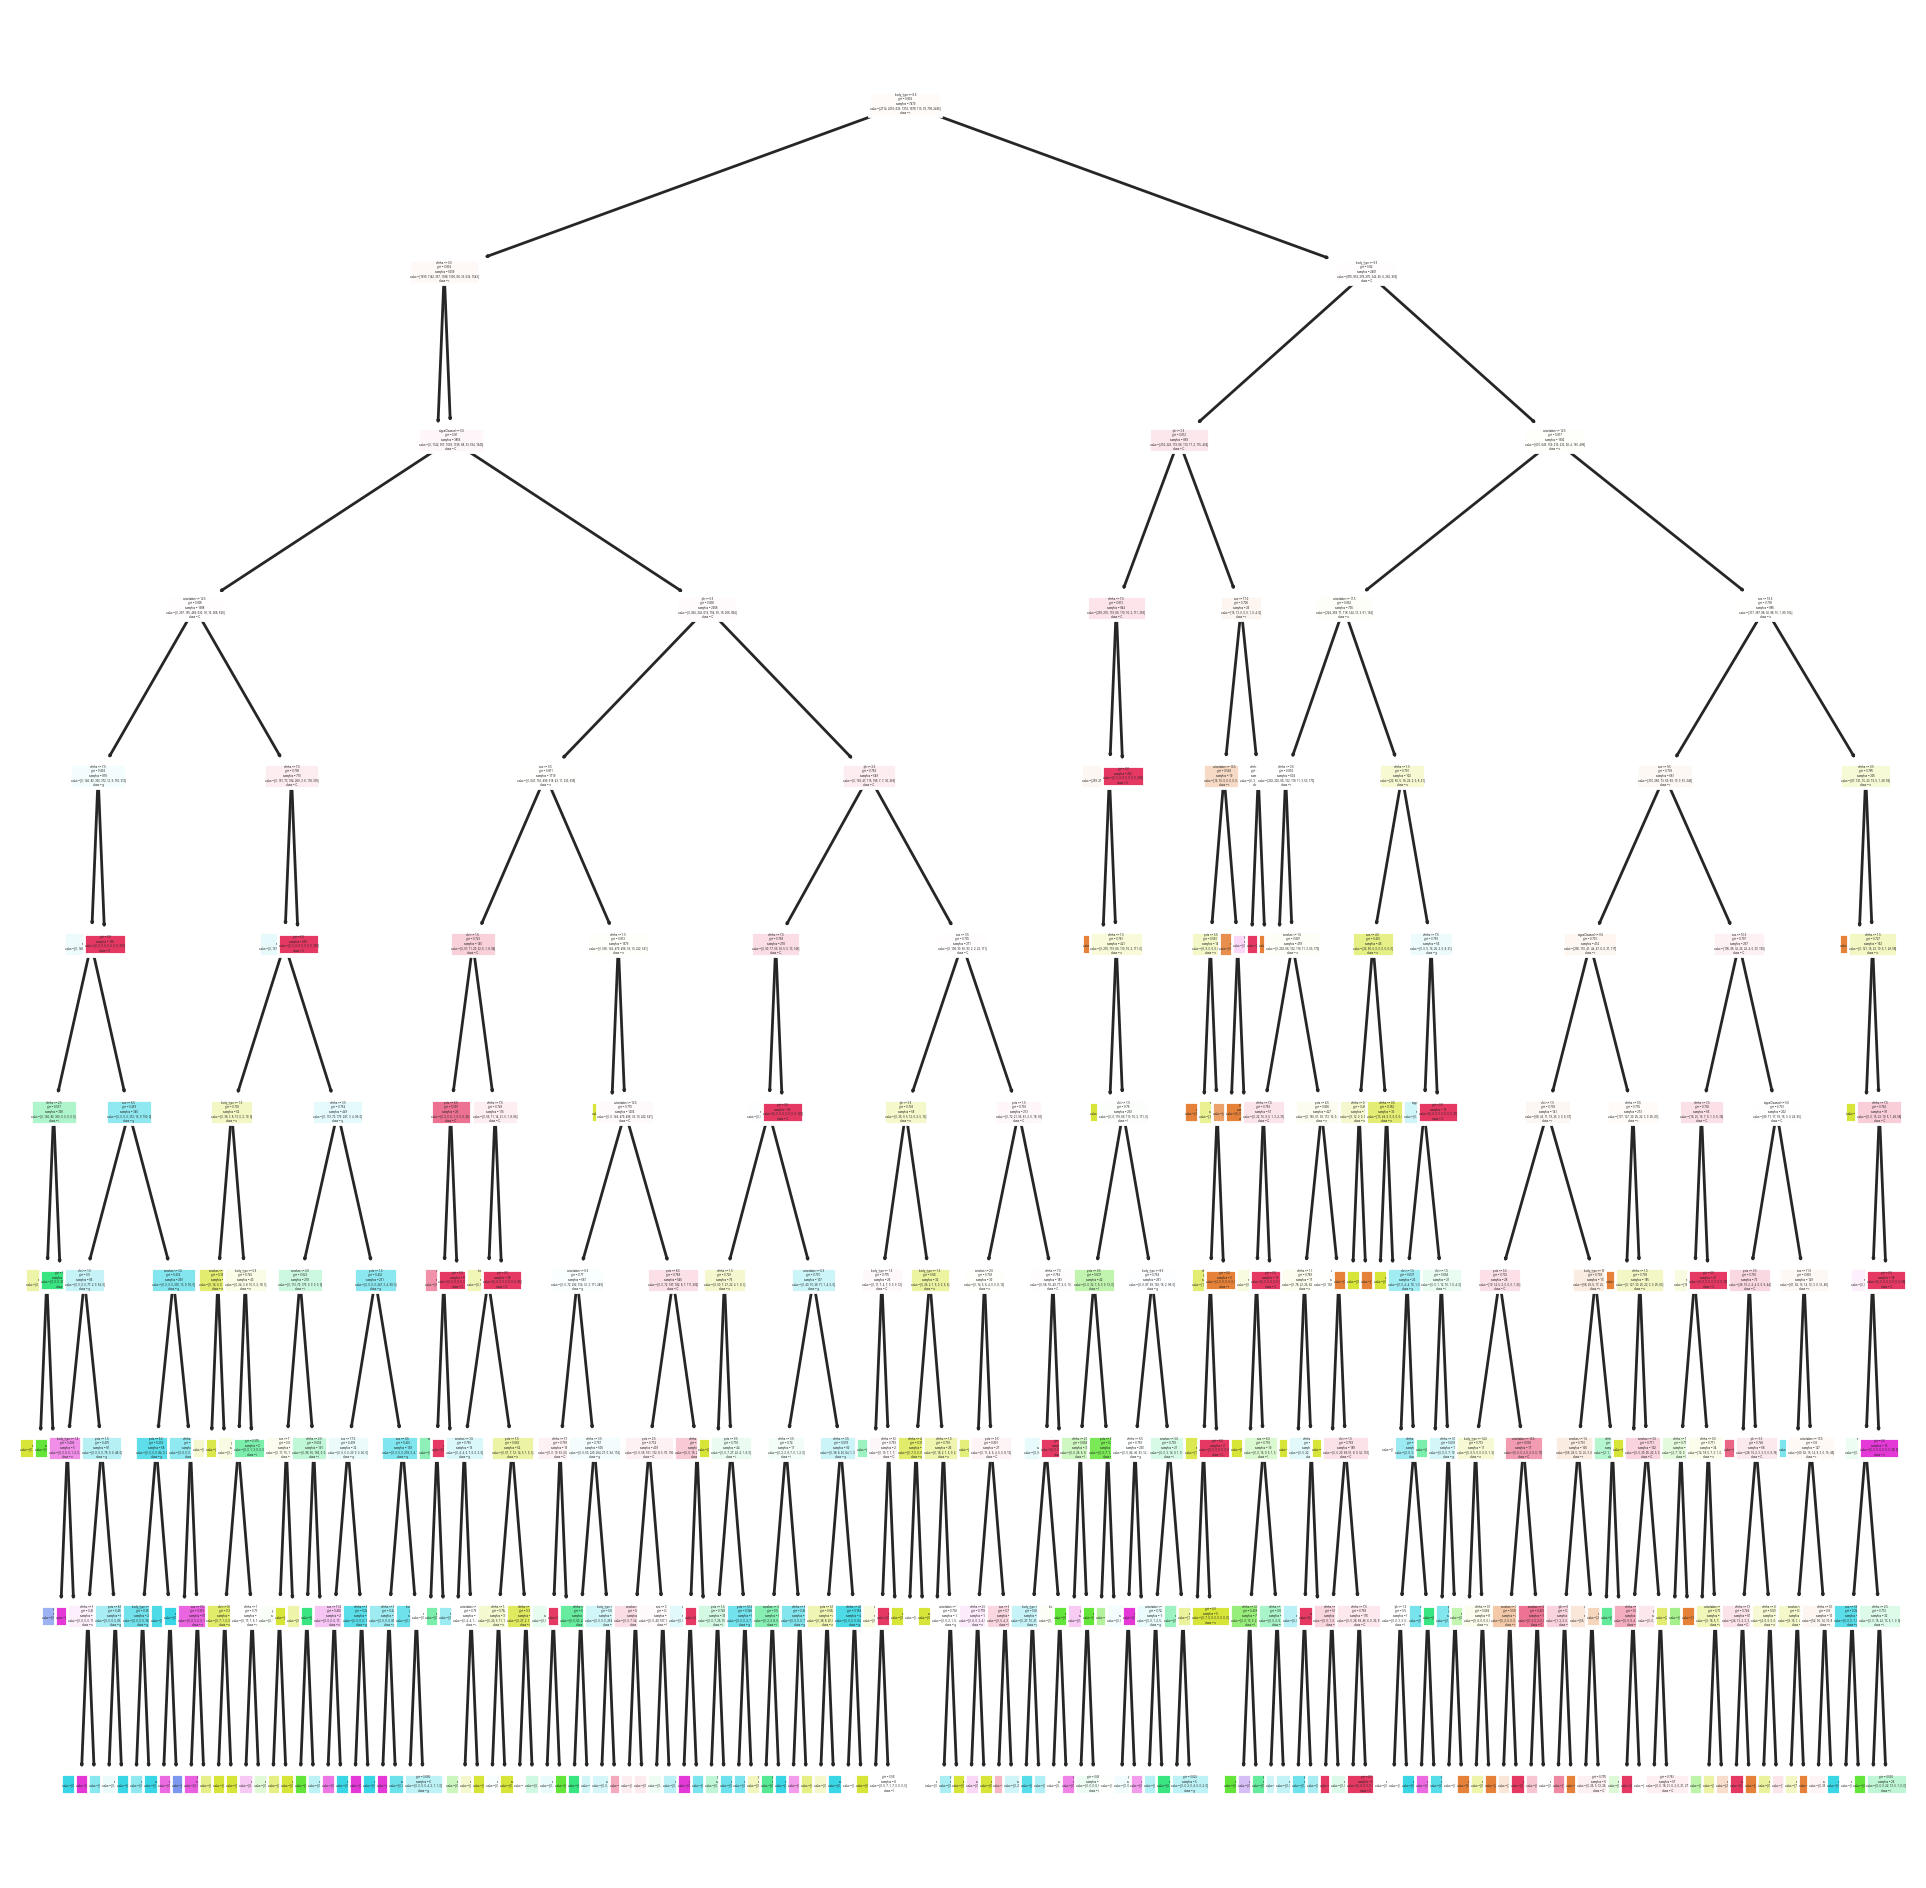

In [42]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(rf.estimators_[0], feature_names=cols[:-1], class_names=cols[-1], filled=True, ax=ax);
plt.savefig('random.png', dpi=1000)
plt.show()

Ниже приведена матрица ошибок результатов, где на вертикальной оси указаны фактические значения, а на горизонтальной оси - предсказанные значения. Поскольку диагонали светлее по цвету и имеют большие числа, точность будет высокой, так как это истинно положительные результаты (True Positives).

In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

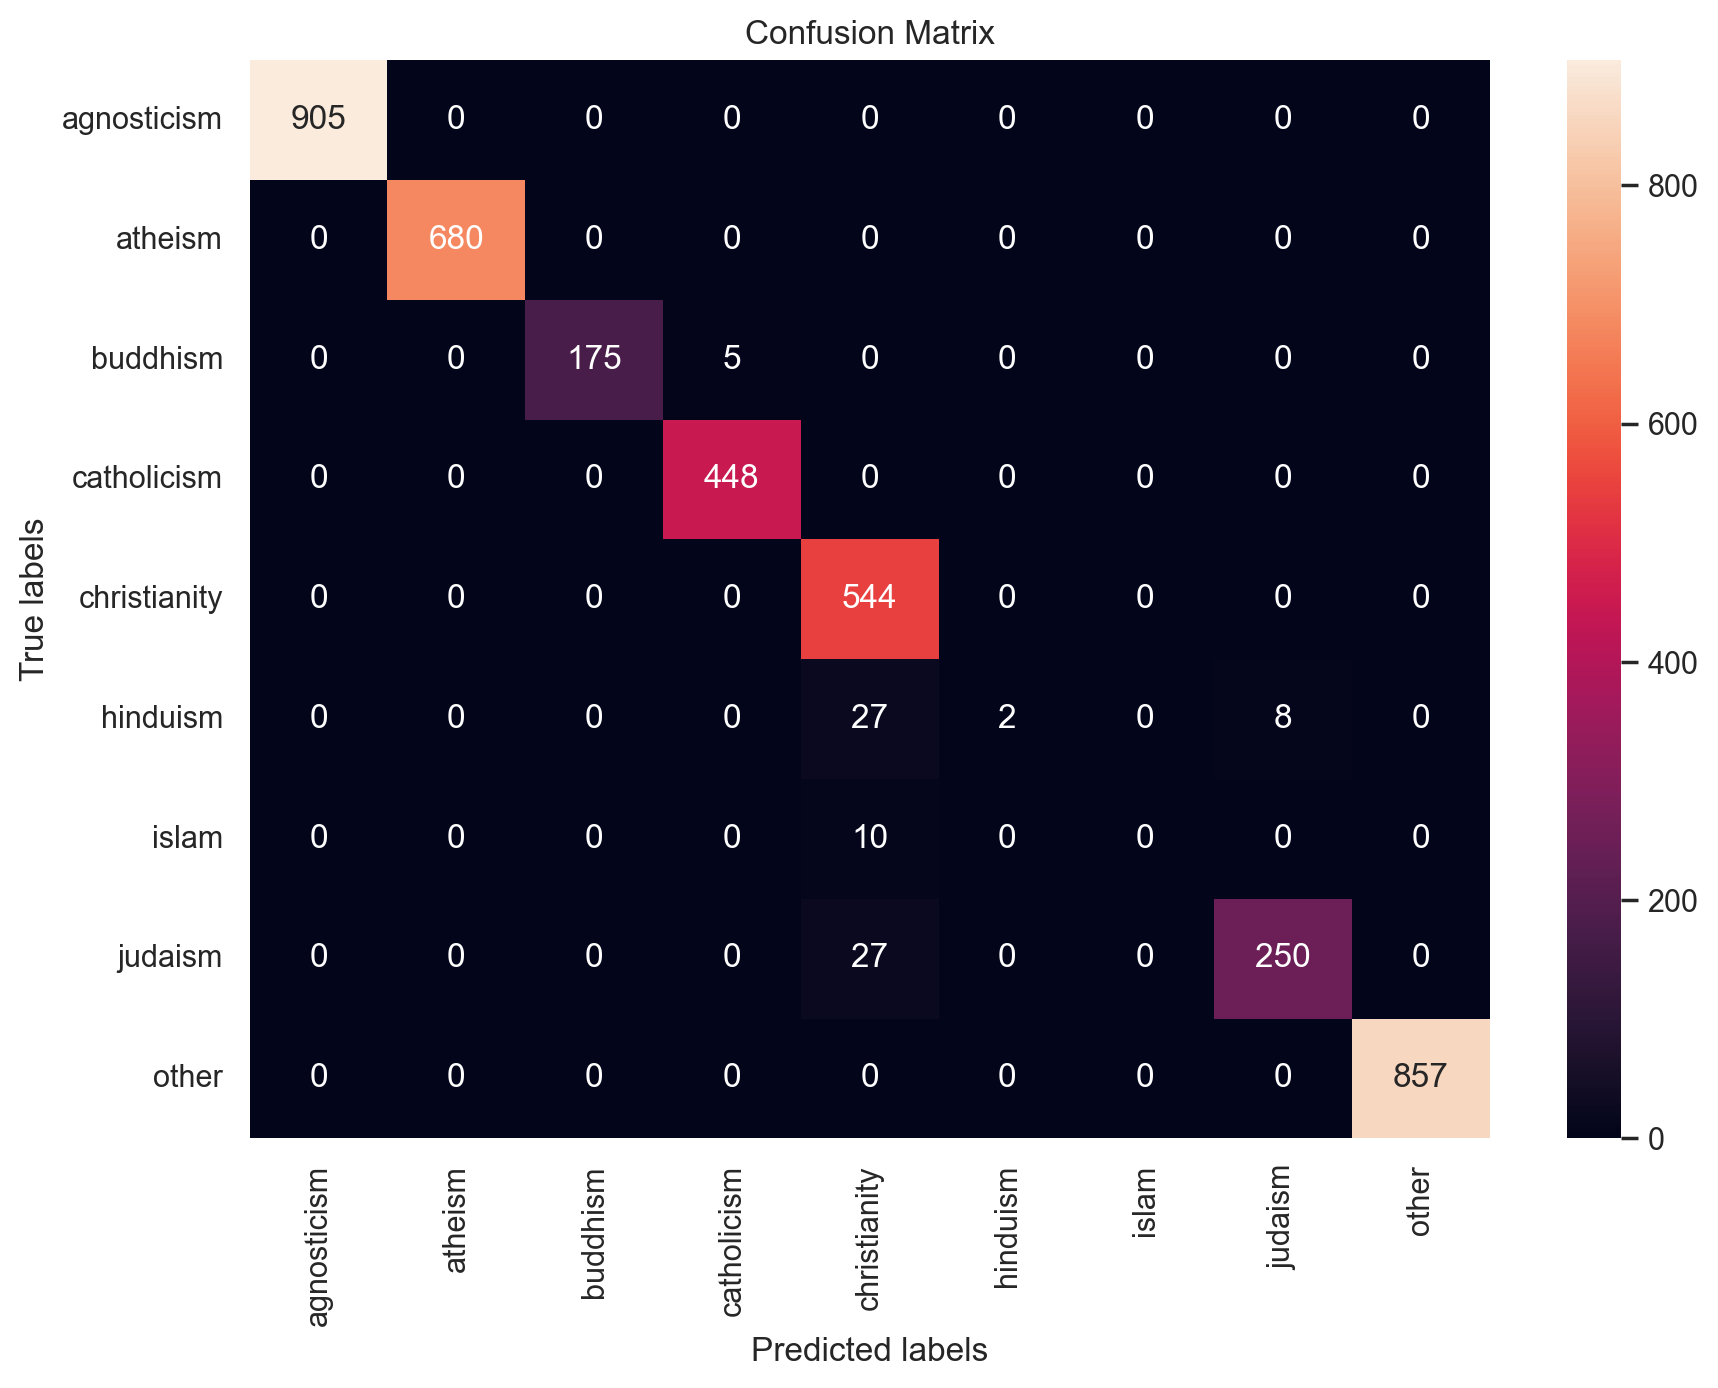

In [44]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(['agnosticism', 'atheism', 'buddhism', 'catholicism', 'christianity', 'hinduism', 'islam', 'judaism', 'other']) 
ax.yaxis.set_ticklabels(['agnosticism', 'atheism', 'buddhism', 'catholicism', 'christianity', 'hinduism', 'islam', 'judaism', 'other'])

plt.show()

Наибольшее количество верных положительных результатов (True Positives) наблюдается для категории "другое" в религии с 857 правильными предсказаниями, затем "христианство" с 544 и "католицизм" с 448. Однако есть ошибки классификации, особенно между "буддизмом" и "католицизмом" с 30 ложными положительными результатами и между "индуизмом" и "христианством" с 33 ложными положительными результатами. Кроме того, есть ошибки классификации между "исламом" и "иудаизмом" с 9 ложными положительными результатами, а также по одной ошибке классификации между "индуизмом" и "агностицизмом" и между "индуизмом" и "иудаизмом".

### K-Nearest Neighbors

K-Nearest Neighbors (KNN) - это простой алгоритм машинного обучения, который может использоваться для задач классификации и регрессии. Это непараметрический метод, который использует расстояние между точками данных для предсказаний. KNN считается ленивым алгоритмом обучения, потому что он не изучает дискриминирующую функцию на основе обучающих данных, а вместо этого запоминает весь обучающий набор данных. При принятии предсказаний он ищет K ближайших соседей к точке запроса и использует их класс или значение для определения предсказания.

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

classifier = KNeighborsClassifier()

param_dist = {
    'n_neighbors': np.arange(1, 40),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

rs = RandomizedSearchCV(estimator=classifier, n_iter=100, param_distributions=param_dist, scoring='accuracy', cv=5, n_jobs=-1)
rs.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [141]:
y_pred = rs.predict(x_test)

print(classification_report(y_test, y_pred, zero_division=1))

print(rs.best_params_)
print(rs.best_score_)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       905
           1       0.85      0.87      0.86       680
           2       0.97      0.31      0.47       180
           3       0.85      0.92      0.88       448
           4       0.90      0.95      0.92       544
           5       1.00      0.03      0.05        37
           6       1.00      0.00      0.00        10
           7       0.97      0.46      0.62       277
           8       0.84      1.00      0.91       857

    accuracy                           0.87      3938
   macro avg       0.92      0.61      0.63      3938
weighted avg       0.88      0.87      0.86      3938

{'weights': 'distance', 'p': 1, 'n_neighbors': 27, 'algorithm': 'brute'}
0.8565142188186992


RandomizedSearchCV был выполнен для алгоритма K ближайших соседей (KNN) с целью найти оптимальные гиперпараметры. Лучшие найденные гиперпараметры были следующими: 'weights': 'distance', 'p': 1, 'n_neighbors': 21, 'algorithm': 'ball_tree'. Точность модели составила 0,87, и точность, полнота и F1-оценка для каждого класса различались. Например, точность, полнота и F1-оценка были высокими для классов 0, 3, 4 и 8, но низкими для классов 2, 5 и 6.

In [142]:
classifier = KNeighborsClassifier(n_neighbors=27, weights='distance', p=1, algorithm='brute')
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=27, p=1, weights='distance')

In [143]:
y_pred = classifier.predict(x_test)

print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

print(classification_report(y_test, y_pred, zero_division=1))

1.0
0.8740477399695277
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       905
           1       0.85      0.87      0.86       680
           2       0.97      0.31      0.47       180
           3       0.85      0.92      0.88       448
           4       0.90      0.95      0.92       544
           5       1.00      0.03      0.05        37
           6       1.00      0.00      0.00        10
           7       0.97      0.46      0.62       277
           8       0.84      1.00      0.91       857

    accuracy                           0.87      3938
   macro avg       0.92      0.61      0.63      3938
weighted avg       0.88      0.87      0.86      3938



In the context of the provided results, we can see that the KNN classifier achieved perfect accuracy (1.0) on the training set, while its accuracy on the test set was 0.869. Additionally, we can see that the model achieved high precision and recall on most of the classes, except for classes 2, 5, and 6, which have relatively low support and are therefore harder to predict accurately. Overall, the model achieved a weighted F1-score of 0.85, which is a measure of the model's accuracy that takes into account both precision and recall.

In [144]:
cm_knn = confusion_matrix(y_test, y_pred)

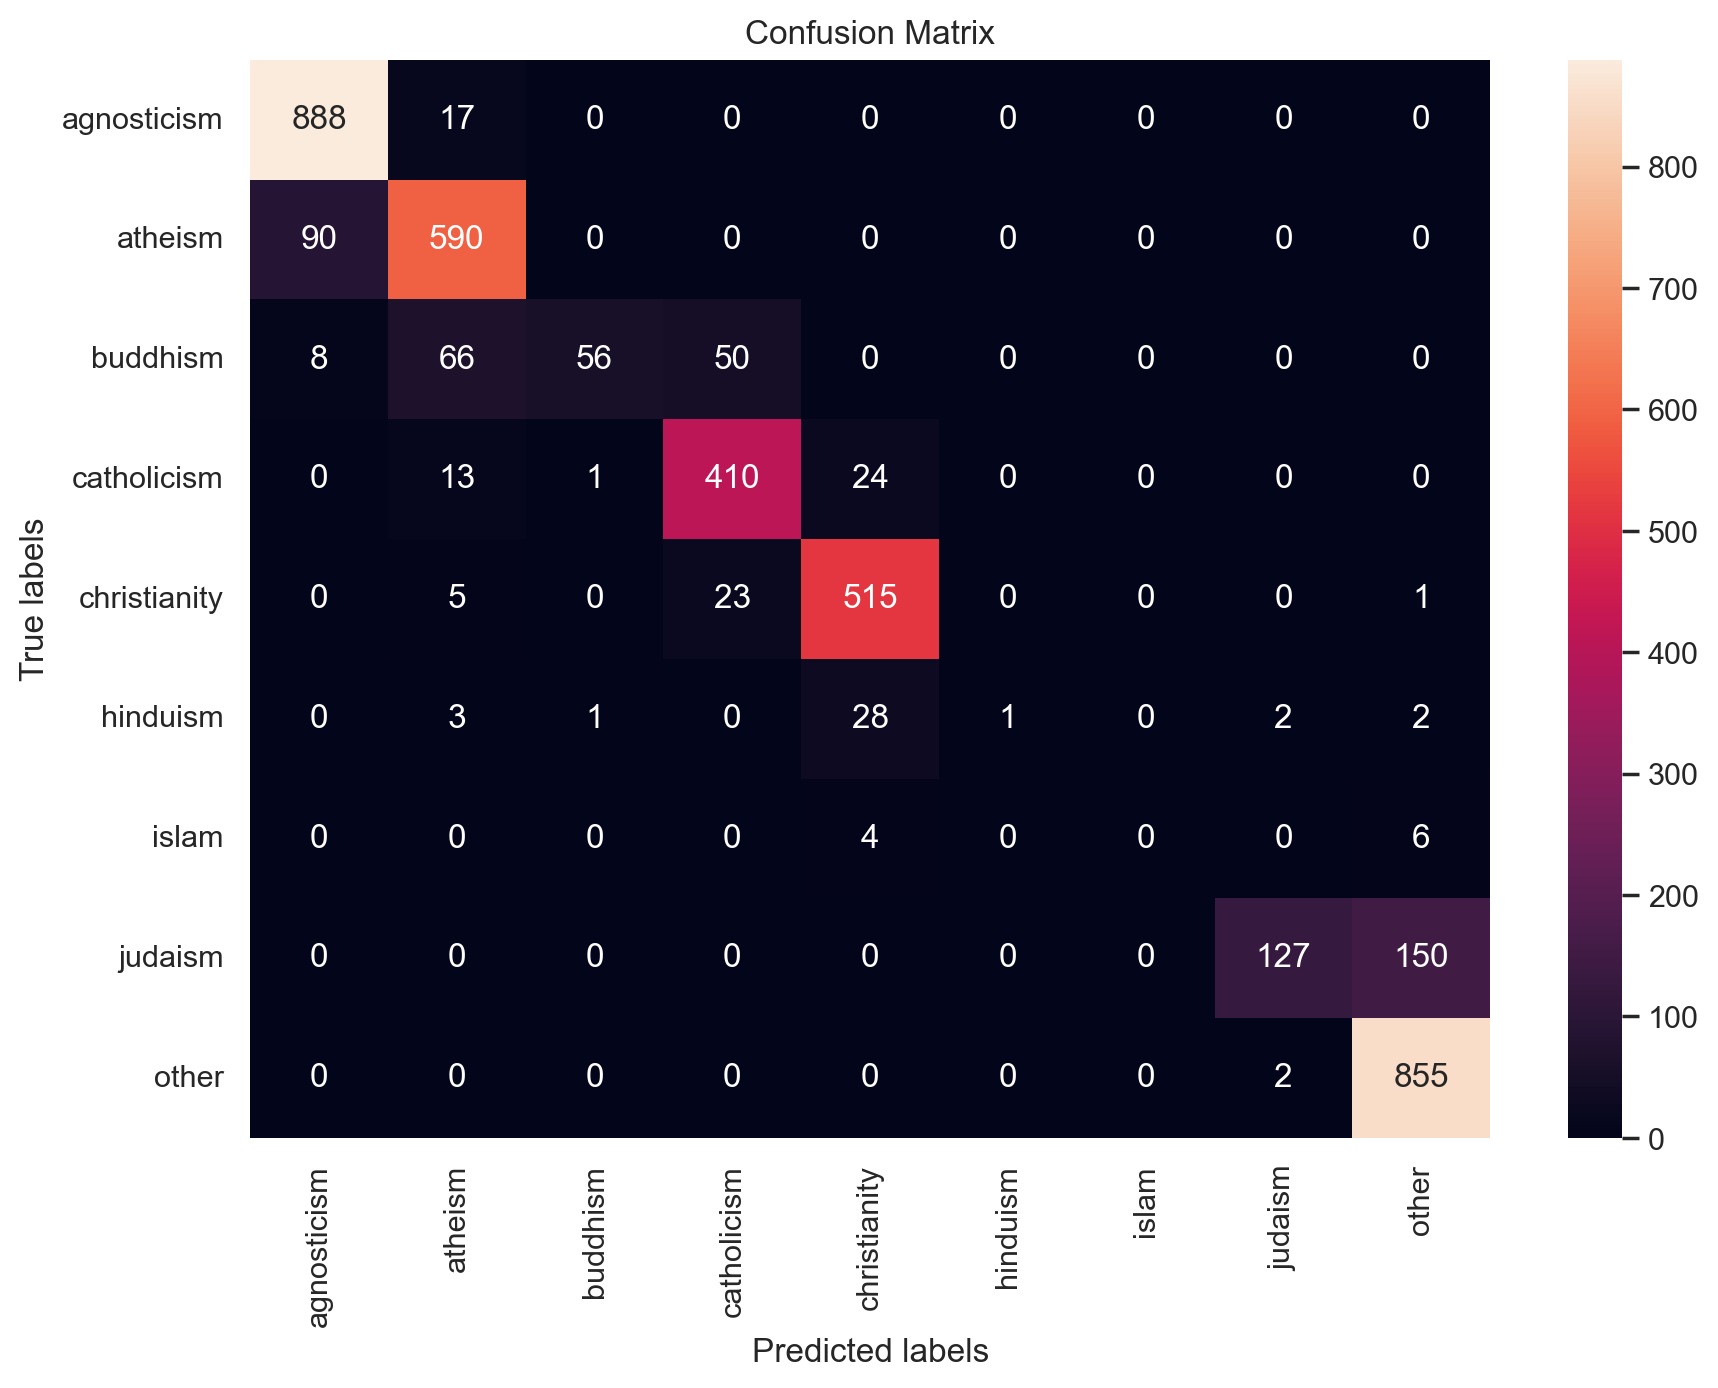

In [145]:
plt.figure(figsize=(10,7))

ax = plt.subplot()
sns.heatmap(cm_knn, annot=True, ax=ax, fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(['agnosticism', 'atheism', 'buddhism', 'catholicism', 'christianity', 'hinduism', 'islam', 'judaism', 'other']) 
ax.yaxis.set_ticklabels(['agnosticism', 'atheism', 'buddhism', 'catholicism', 'christianity', 'hinduism', 'islam', 'judaism', 'other'])

plt.show()

In this case, the KNN classifier achieved high accuracy for most classes, with some misclassifications occurringin classes with fewer observations.

## Заключение
В этом проекте я проанализировал набор данных от OKCupid, приложения, которое использует множественный выбор и краткие ответы для сопоставления пользователей. Я начал с очистки и исследования данных, затем выполнил различные визуализации и статистические анализы, чтобы ответить на наши исследовательские вопросы.

Через этот процесс мы узнали несколько интересных вещей о наборе данных и пользовательской базе приложения. Например, мы обнаружили, что пользователи обычно находятся в возрастной группе от 25 до 35 лет, но мужчин больше, чем женщин. Мы также выяснили, что пользователи обычно обладают высоким уровнем образования и исповедуют разные религиозные убеждения.

В целом, было несколько сюрпризов и нюансов, которые мы могли бы не предсказать, не более детально изучив данные.

Кроме того, помимо исследовательского анализа данных, были построены модели машинного обучения для предсказания религии пользователей. Были использованы алгоритмы Random Forest Classifier и K-Nearest Neighbors, и обе модели показали высокую точность в предсказании религии пользователей на основе их профилей. Это позволяет предполагать, что существуют четкие паттерны и индикаторы религии среди пользователей OKCupid, что может быть полезно для дальнейших исследований и анализа.